<a href="https://colab.research.google.com/github/SighOfFrostmourne/ECOM6022/blob/main/Project_Zangri_la_Hotel.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
## Mount notebook to Google Drive
from google.colab import drive
drive.mount("/content/drive", force_remount=True) # This ensure you remount previously mounted drive
# You will be asked to give permission to mount your google drive.  Permit this and allow all access.

Mounted at /content/drive


In [8]:
# importing libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno

import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
# from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import VotingClassifier

import folium
from folium.plugins import HeatMap
import plotly.express as px

plt.style.use('fivethirtyeight')
%matplotlib inline
pd.set_option('display.max_columns', 32)


In [2]:
# Common imports, generally used througout this course
import numpy as np
import os
import sklearn

# to make this notebook's output stable across runs (ensure repeatibility)
np.random.seed(42)   # we shall use seed(42) throughout

# To plot pretty figures (we have also used this in previous topics)
%matplotlib inline  
# function to activate interactive support for matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)


ROOT_PATH = "/content/drive/MyDrive/Colab/Project"
# change working directory to Google Directory Root
os.chdir(ROOT_PATH)


# Where to save the figures (the default here is ./images)
PROJECT_ROOT_DIR = "."
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import urllib.request

DOWNLOAD_ROOT = "/content/drive/MyDrive/Colab/Project"
DATA_URL = os.path.join(DOWNLOAD_ROOT, "Zangrila_dataset.csv")


# We shall be using pandas DataFrame to manage all our data
# Use function for clear documentation and modularization
import pandas as pd

def load_data(data_path=DATA_URL):
    csv_path = data_path
    return pd.read_csv(csv_path)

# Useful to get a "peek" at the data using .head()
hotel = load_data(DATA_URL)
hotel.head()

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
0   KLN             0        342             0               2017   
1   KLN             0        737             0               2017   
2   KLN             0          7          1875               2017   
3   KLN             0         13          1875               2017   
4   KLN             0         14          2450               2017   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0               July                        27                          1   
1               July                        27                          1   
2               July                        27                          1   
3               July                        27                          1   
4               July                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_cancelled  \
0                  0                       0                                0   
1                  0                       0                                0   
2                  0                       0                                0   
3                  0                       0                                0   
4                  0                       0                                0   

  room_type  booking_changes deposit_type  require_pickup  
0         C                3   No Deposit               0  
1         C                4   No Deposit               0  
2         A                0   No Deposit               0  
3         A                0   No Deposit               0  
4         A                0   No Deposit               0

#Exploratory Data Analysis

In [ ]:
# Can call for basic look at data.
hotel.info()

In [ ]:
hotel.describe()

In [ ]:
# The data has a lot more 1s than 0s. 

# mortgage['loan_status'].value_counts()

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc878a79bd0>,
      dtype=object)

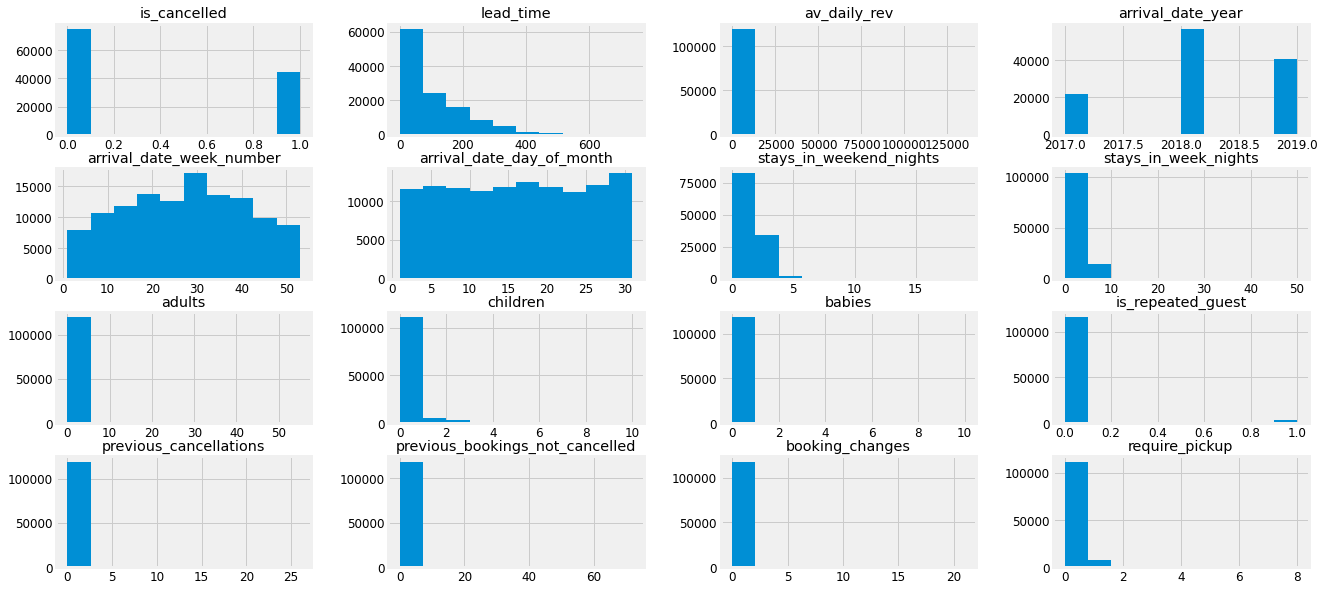

In [ ]:
# plt.figure(figsize=[20,10])
hotel.hist(figsize=[20,10])

In [5]:
# Less Cancelled cases. 

hotel['is_cancelled'].value_counts()

0    75166
1    44224
Name: is_cancelled, dtype: int64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fc877e4a210>,
      dtype=object)

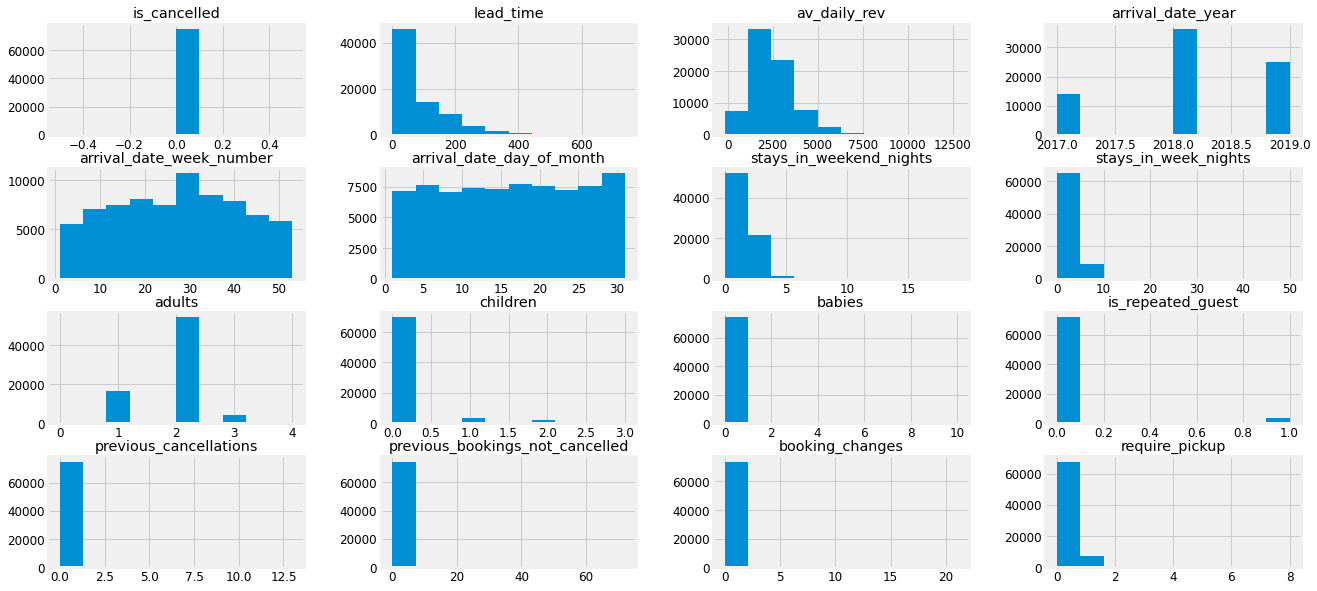

In [ ]:
hotel[hotel['is_cancelled'] == 0].hist(figsize=[20,10])

In [ ]:
hotel.corr()

is_cancelled  lead_time  av_daily_rev  \
is_cancelled                         1.000000   0.293123      0.047552   
lead_time                            0.293123   1.000000     -0.063067   
av_daily_rev                         0.047552  -0.063067      1.000000   
arrival_date_year                    0.016660   0.040142      0.197579   
arrival_date_week_number             0.008148   0.126871      0.075794   
arrival_date_day_of_month           -0.006130   0.002268      0.030245   
stays_in_weekend_nights             -0.001791   0.085671      0.049353   
stays_in_week_nights                 0.024765   0.165799      0.065249   
adults                               0.060017   0.119519      0.230652   
children                             0.005048  -0.037622      0.324858   
babies                              -0.032491  -0.020915      0.029186   
is_repeated_guest                   -0.084793  -0.124410     -0.134321   
previous_cancellations               0.110133   0.086042     -0.065645   
previous_bookings_not_cancelled     -0.057358  -0.073548     -0.072148   
booking_changes                     -0.144381   0.000149      0.019619   
require_pickup                      -0.195498  -0.116451      0.056627   

                                 arrival_date_year  arrival_date_week_number  \
is_cancelled                              0.016660                  0.008148   
lead_time                                 0.040142                  0.126871   
av_daily_rev                              0.197579                  0.075794   
arrival_date_year                         1.000000                 -0.540561   
arrival_date_week_number                 -0.540561                  1.000000   
arrival_date_day_of_month                -0.000221                  0.066809   
stays_in_weekend_nights                   0.021497                  0.018208   
stays_in_week_nights                      0.030883                  0.015558   
adults                                    0.029635                  0.025909   
children                                  0.054624                  0.005518   
babies                                   -0.013192                  0.010395   
is_repeated_guest                         0.010341                 -0.030131   
previous_cancellations                   -0.119822                  0.035501   
previous_bookings_not_cancelled           0.029218                 -0.020904   
booking_changes                           0.030872                  0.005508   
require_pickup                           -0.013684                  0.001920   

                                 arrival_date_day_of_month  \
is_cancelled                                     -0.006130   
lead_time                                         0.002268   
av_daily_rev                                      0.030245   
arrival_date_year                                -0.000221   
arrival_date_week_number                          0.066809   
arrival_date_day_of_month                         1.000000   
stays_in_weekend_nights                          -0.016354   
stays_in_week_nights                             -0.028174   
adults                                           -0.001566   
children                                          0.014544   
babies                                           -0.000230   
is_repeated_guest                                -0.006145   
previous_cancellations                           -0.027011   
previous_bookings_not_cancelled                  -0.000300   
booking_changes                                   0.010613   
require_pickup                                    0.008683   

                                 stays_in_weekend_nights  \
is_cancelled                                   -0.001791   
lead_time                                       0.085671   
av_daily_rev                                    0.049353   
arrival_date_year                               0.021497   
arrival_date_week_number                        0.018208  

#Multivariate Analysis

In [6]:
# df = hotel[~filter]
# df = hotel[hotel['hotel'] == 'HK']

df = hotel.copy()
df.head()



hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
0   KLN             0        342             0               2017   
1   KLN             0        737             0               2017   
2   KLN             0          7          1875               2017   
3   KLN             0         13          1875               2017   
4   KLN             0         14          2450               2017   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0               July                        27                          1   
1               July                        27                          1   
2               July                        27                          1   
3               July                        27                          1   
4               July                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_cancelled  \
0                  0                       0                                0   
1                  0                       0                                0   
2                  0                       0                                0   
3                  0                       0                                0   
4                  0                       0                                0   

  room_type  booking_changes deposit_type  require_pickup  
0         C                3   No Deposit               0  
1         C                4   No Deposit               0  
2         A                0   No Deposit               0  
3         A                0   No Deposit               0  
4         A                0   No Deposit               0

In [ ]:
df['hotel'].value_counts()

HK     79330
KLN    40060
Name: hotel, dtype: int64

Cancelations in HK hotel=  0.41726963317786464
Cancelations in KLN hotel=  0.27763354967548676


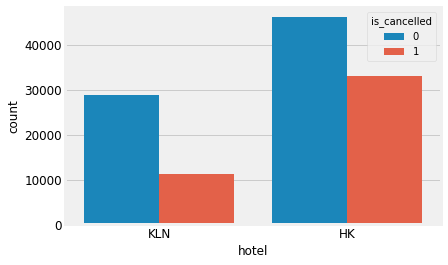

In [9]:
#Cancellation in HK hotel is a higher percentage than KLN. 

sns.countplot(data=df, x='hotel', hue='is_cancelled')
hk_cancelled = df[(df['hotel']=='HK') & (df['is_cancelled']==1)]
kln_cancelled = df[(df['hotel']=='KLN') & (df['is_cancelled']==1)]
print('Cancelations in HK hotel= ', (len(hk_cancelled))/(len(df[df['hotel']=='HK'])))
print('Cancelations in KLN hotel= ', (len(kln_cancelled))/(len(df[df['hotel']=='KLN'])))



In [10]:

# Some bookings don't have both weekday or weekend nights.

print(len(df[(df['stays_in_weekend_nights']==0) & (df['stays_in_week_nights']==0)])) 



715


In [ ]:
#The number of customers having children or babies or both are only 8% of the total population.
# Higher percentage of cancellation for guests without children, but sample size is too low compared to "no children".
((len(df.loc[(df['children']!=0) | (df['babies']!=0)]))/(len(df))) * 100


7.819750397855767

In [11]:
df[df['babies']!=0]

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
280      KLN             0        102          1845               2017   
282      KLN             0         78          3475               2017   
417      KLN             0         84          2425               2017   
460       HK             1        100          2340               2017   
616      KLN             0         78          2050               2017   
...      ...           ...        ...           ...                ...   
118544   KLN             0        236          3114               2019   
118545   KLN             0        184          3075               2019   
118641    HK             0         16          3150               2019   
118944    HK             0          0          3750               2019   
119197   KLN             0         43          4240               2019   

       arrival_date_month  arrival_date_week_number  \
280                  July                        27   
282                  July                        27   
417                  July                        28   
460                  July                        28   
616                  July                        28   
...                   ...                       ...   
118544             August                        34   
118545             August                        34   
118641             August                        34   
118944             August                        35   
119197             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
280                             4                        2   
282                             4                        2   
417                             6                        1   
460                             6                        1   
616                             9                        0   
...                           ...                      ...   
118544                         26                        2   
118545                         26                        2   
118641                         26                        2   
118944                         28                        1   
119197                         30                        0   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
280                        5       2       0.0       1                  0   
282                        5       2       0.0       1                  0   
417                        3       2       0.0       1                  0   
460                        4       2       0.0       1                  0   
616                        3       2       0.0       1                  0   
...                      ...     ...       ...     ...                ...   
118544                     5       2       0.0       1                  0   
118545                     5       2       0.0       1                  0   
118641                     1       2       0.0       1                  0   
118944                     0       2       1.0       1                  0   
119197                     4       2       0.0       1                  0   

        previous_cancellations  previous_bookings_not_cancelled room_type  \
280                          0                                0         A   
282                          0                                0         E   
417                          0                                0         D   
460                          0                                0         A   
616                          0                                0         A   
...                        ...                              ...       ...   
118544                       0                                0         A   
118545                       0                                0         A   
118641                       0                                0         A   
118944           

In [ ]:
# df['customer_type'] = 'Business'

In [ ]:
# df['customer_type'][(df['children']!=0) | (df['babies']!=0)] = 'Family'

In [ ]:
# df.loc[(df['children']!=0) | (df['babies']!=0)]['customer_type']

In [ ]:
df

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
0        KLN             0        342             0               2017   
1        KLN             0        737             0               2017   
2        KLN             0          7          1875               2017   
3        KLN             0         13          1875               2017   
4        KLN             0         14          2450               2017   
...      ...           ...        ...           ...                ...   
119385    HK             0        188          2475               2019   
119386    HK             0        164          2190               2019   
119387    HK             0        102          5636               2019   
119388    HK             0         34          3943               2019   
119389    HK             0        109          2610               2019   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
2                    July                        27   
3                    July                        27   
4                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
2                               1                        0   
3                               1                        0   
4                               1                        0   
...                           ...                      ...   
119385                         31                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         31                        2   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
0                          0       2       0.0       0                  0   
1                          0       2       0.0       0                  0   
2                          1       1       0.0       0                  0   
3                          1       1       0.0       0                  0   
4                          2       2       0.0       0                  0   
...                      ...     ...       ...     ...                ...   
119385                     3       2       0.0       0                  0   
119386                     4       2       0.0       0                  0   
119387                     5       3       0.0       0                  0   
119388                     5       2       0.0       0                  0   
119389                     5       2       0.0       0                  0   

        previous_cancellations  previous_bookings_not_cancelled room_type  \
0                            0                                0         C   
1                            0                                0         C   
2                            0                                0         A   
3                            0                                0         A   
4                            0                                0         A   
...                        ...                              ...       ...   
119385                       0                                0         A   
119386                       0                                0         A   
119387                       0                                0         E   
119388           

In [ ]:
# # Cancellation with or without children and babies

# sns.countplot(data=df, x='customer_type', hue='is_cancelled')
# no_children = df[(df['children']==0) & (df['babies']==0) & (df['is_cancelled']==1)]
# hv_children = df[(df['children']>0) & (df['babies']>0) & (df['is_cancelled']==1)]
# print('Cancelations among guests with children= ', (len(no_children))/(len(df[df['children']==0])))
# print('Cancelations among guests without children= ', (len(hv_children))/(len(df[df['children']==1])))


Cancelations among guests with no children=  0.37089786634896565
Cancelations among guests with children=  0.3639115250291036


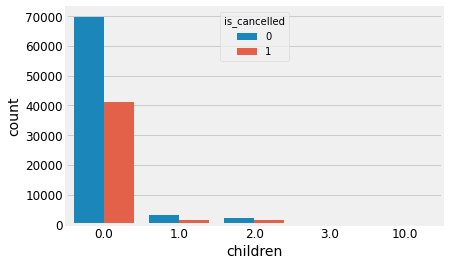

In [ ]:
# Cancellation with or without children

sns.countplot(data=df, x='children', hue='is_cancelled')
no_children = df[(df['children']==0) & (df['is_cancelled']==1)]
hv_children = df[(df['children']>0) & (df['is_cancelled']==1)]
print('Cancelations among guests with no children= ', (len(no_children))/(len(df[df['children']==0])))
print('Cancelations among guests with children= ', (len(hv_children))/(len(df[df['children']>0])))


Cancelations among guests without babies=  0.3718737602660522
Cancelations among guests with babies=  0.1821155943293348
Cancelations among guests with babies only=  0.1450381679389313


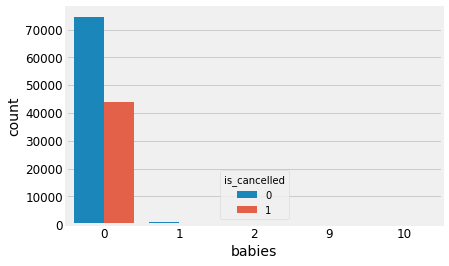

In [ ]:
# Cancellation with or without babies

sns.countplot(data=df, x='babies', hue='is_cancelled')
no_babies = df[(df['babies']==0) & (df['is_cancelled']==1)]
hv_babies = df[(df['babies']>0) & (df['is_cancelled']==1)]
hv_babies_only = df[(df['babies']>0) & (df['children']==0) & (df['is_cancelled']==1)]
print('Cancelations among guests without babies= ', (len(no_babies))/(len(df[df['babies']==0])))
print('Cancelations among guests with babies= ', (len(hv_babies))/(len(df[df['babies']>0])))
print('Cancelations among guests with babies only= ', (len(hv_babies_only))/(len(df[df['babies']>0])))



In [ ]:
df[(df['children']>0)]

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
13       KLN             0         18          3869               2017   
42       KLN             0        149          1740               2017   
134      KLN             1         47          3825               2017   
144      KLN             0          1          2675               2017   
215      KLN             0         10          3825               2017   
...      ...           ...        ...           ...                ...   
119308   KLN             0        212          2244               2019   
119313    HK             1        134          4063               2019   
119315    HK             1        134          6063               2019   
119330    HK             1         23          6067               2019   
119344    HK             0          3          2375               2019   

       arrival_date_month  arrival_date_week_number  \
13                   July                        27   
42                   July                        27   
134                  July                        27   
144                  July                        27   
215                  July                        27   
...                   ...                       ...   
119308             August                        35   
119313             August                        35   
119315             August                        35   
119330             August                        35   
119344             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
13                              1                        0   
42                              1                        2   
134                             2                        2   
144                             2                        0   
215                             3                        0   
...                           ...                      ...   
119308                         31                        2   
119313                         31                        0   
119315                         31                        0   
119330                         31                        0   
119344                         31                        0   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
13                         4       2       1.0       0                  0   
42                         5       2       1.0       0                  0   
134                        5       2       2.0       0                  0   
144                        1       2       2.0       0                  0   
215                        2       2       2.0       0                  0   
...                      ...     ...       ...     ...                ...   
119308                     8       2       1.0       0                  0   
119313                     2       2       1.0       0                  0   
119315                     2       2       1.0       0                  0   
119330                     3       2       2.0       0                  0   
119344                     1       2       1.0       0                  1   

        previous_cancellations  previous_bookings_not_cancelled room_type  \
13                           0                                0         G   
42                           0                                0         A   
134                          0                                0         G   
144                          0                                0         C   
215                          0                                0         G   
...                        ...                              ...       ...   
119308                       0                                0         A   
119313                       0                                0         D   
119315                       0                                0         F   
119330           

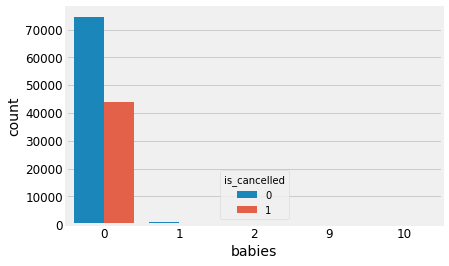

In [ ]:
sns.countplot(data=df, x='babies', hue='is_cancelled')

Cancelations among new guests=  0.3778508392455442
Cancelations among old guests=  0.14488188976377953


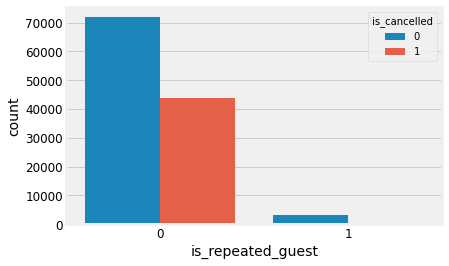

In [ ]:
#Repeated guests showed very low cancellation rate. But most are new guests. 

sns.countplot(data=df, x='is_repeated_guest', hue='is_cancelled')
new_guest = df[(df['is_repeated_guest']==0) & (df['is_cancelled']==1)]
old_guest = df[(df['is_repeated_guest']==1) & (df['is_cancelled']==1)]
print('Cancelations among new guests= ', (len(new_guest))/(len(df[df['is_repeated_guest']==0])))
print('Cancelations among old guests= ', (len(old_guest))/(len(df[df['is_repeated_guest']==1])))

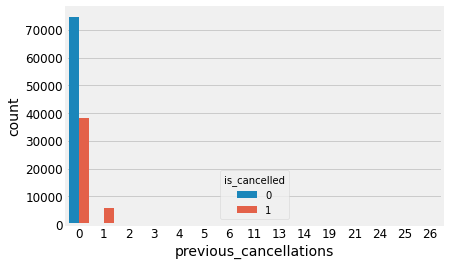

In [ ]:
# Should omit 0, 1 and check again.

sns.countplot(data=df, x='previous_cancellations', hue='is_cancelled')

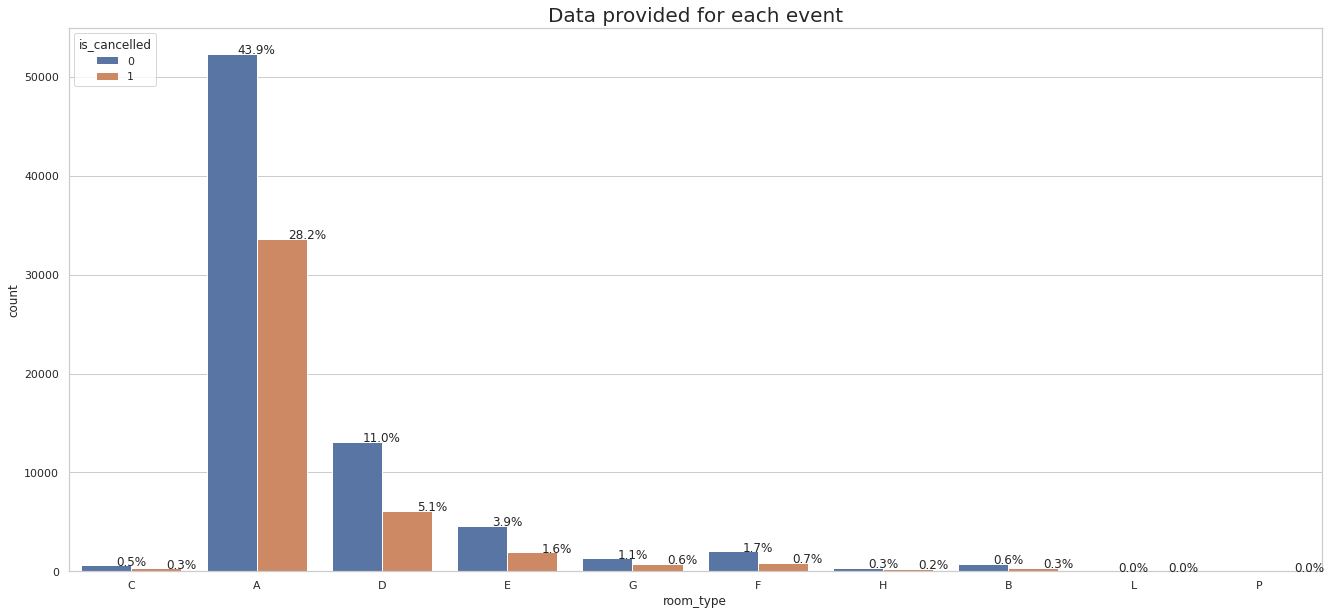

In [12]:
# Need re-try by using length of each room type to give out percentage.

sns.set(style="whitegrid")
plt.figure(figsize=(20,10))
total = float(len(df))
ax = sns.countplot(x="room_type", hue="is_cancelled", data=df)
plt.title('Data provided for each event', fontsize=20)
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height()/total)
    x = p.get_x() + p.get_width()
    y = p.get_height()
    ax.annotate(percentage, (x, y),ha='center')
plt.show()

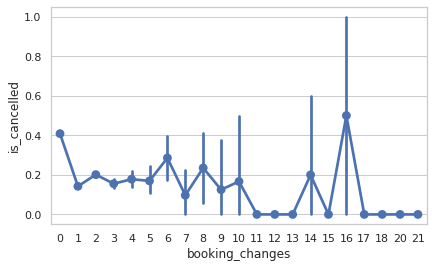

In [ ]:
sns.pointplot(data=df, x='booking_changes', y='is_cancelled')

                           count
deposit_type is_cancelled       
No Deposit   0             74947
             1             29694
Non Refund   0                93
             1             14494
Refundable   0               126
             1                36
                               count
deposit_type is_cancelled           
No Deposit   0             71.622978
             1             28.377022
Non Refund   0              0.637554
             1             99.362446
Refundable   0             77.777778
             1             22.222222


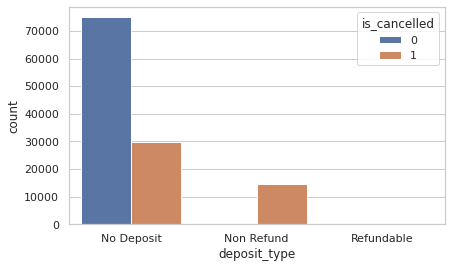

In [ ]:
# Deposit type 

sns.countplot(x="deposit_type", hue="is_cancelled",data=df)

depo = df.groupby(['deposit_type', 'is_cancelled']).size().to_frame(name='count')
depo_perct = depo.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(depo)
print(depo_perct)

                                count
arrival_date_year is_cancelled       
2017              0             13854
                  1              8142
2018              0             36370
                  1             20337
2019              0             24942
                  1             15745
                                    count
arrival_date_year is_cancelled           
2017              0             62.984179
                  1             37.015821
2018              0             64.136703
                  1             35.863297
2019              0             61.302136
                  1             38.697864


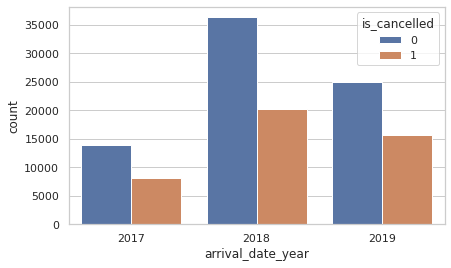

In [ ]:
sns.countplot(data=df, x='arrival_date_year', hue='is_cancelled')
# df.groupby('arrival_date_year')['arrival_date_year'].count()
yr = df.groupby(['arrival_date_year', 'is_cancelled']).size().to_frame(name='count')

yr_perct = yr.groupby(level=0).apply(lambda x:100 * x / float(x.sum()))
print(yr)
print(yr_perct)

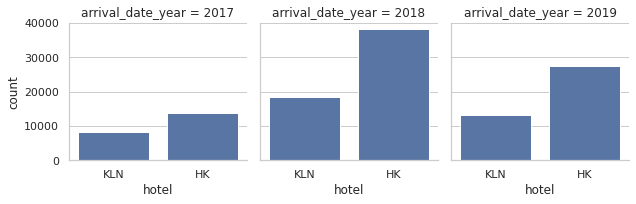

In [ ]:
grid = sns.FacetGrid(df, col='arrival_date_year')
grid.map(sns.countplot, 'hotel')



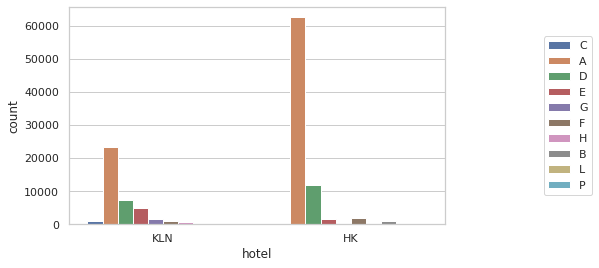

In [ ]:
g = sns.countplot(data=df, x='hotel', hue='room_type')
g.legend(loc='center left', bbox_to_anchor=(1.25, 0.5), ncol=1)

In [ ]:
# df[df['room_type'] == 'A']

In [ ]:
df.pivot_table(columns='hotel', values=['stays_in_weekend_nights', 'stays_in_week_nights'], aggfunc=lambda x:x.sum())

hotel                        HK     KLN
stays_in_week_nights     173174  125337
stays_in_weekend_nights   63082   47664

In [ ]:
data = df.copy()

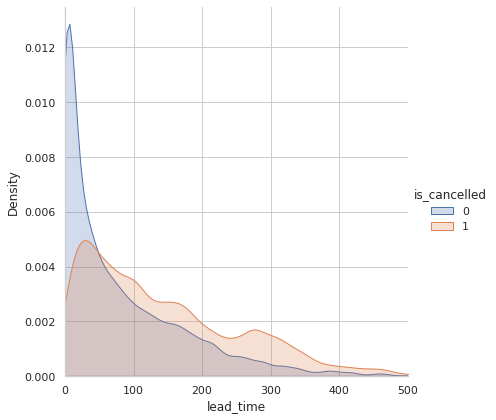

In [ ]:
(sns.FacetGrid(data, hue = 'is_cancelled',
             height = 6,
             xlim = (0,500))
    .map(sns.kdeplot, 'lead_time', shade = True)
    .add_legend());

In [ ]:
df[df['lead_time'] < 60 ]['is_cancelled'].value_counts()

0    42050
1    13190
Name: is_cancelled, dtype: int64

In [ ]:
df[df['lead_time'] < 60 ]['is_cancelled'].value_counts(normalize=True)

0    0.761224
1    0.238776
Name: is_cancelled, dtype: float64

In [ ]:
df[df['lead_time'] > 60 ]['is_cancelled'].value_counts()

0    32849
1    30865
Name: is_cancelled, dtype: int64

In [ ]:
df[df['lead_time'] > 60 ]['is_cancelled'].value_counts(normalize=True)

0    0.51557
1    0.48443
Name: is_cancelled, dtype: float64

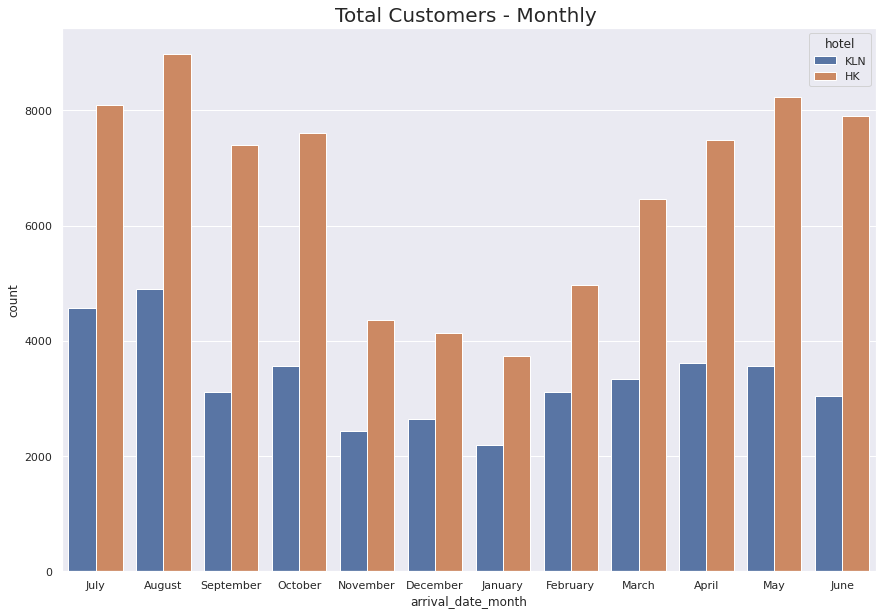

In [ ]:

plt.figure(figsize =(13,10))
sns.set(style="darkgrid")
plt.title("Total Customers - Monthly ", fontdict={'fontsize': 20})
ax = sns.countplot(x = "arrival_date_month", hue = 'hotel', data = data)



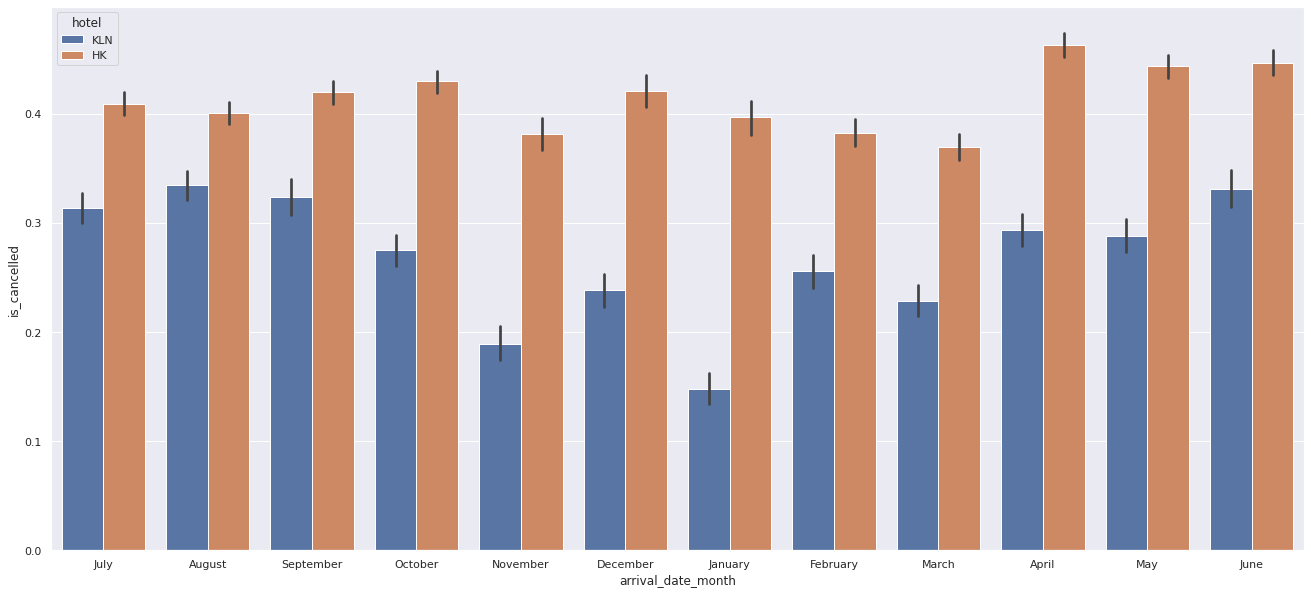

In [ ]:
#Cancellation of KLN hotel is more seasonal, HK hotel is rather evenly distributed. 

plt.figure(figsize = (20,10))
sns.barplot(x = 'arrival_date_month', y = 'is_cancelled', hue = 'hotel', data = data);

In [ ]:
data = df[df['is_cancelled'] == 0]

px.box(data_frame = data, x = 'room_type', y = 'av_daily_rev', color = 'hotel', template = 'plotly_dark')

In [ ]:
# Room type P was missing in the boxplot.

df['room_type'].unique()

array(['C', 'A', 'D', 'E', 'G', 'F', 'H', 'B', 'L', 'P'], dtype=object)

In [ ]:
# Room type P has not revenue for all entries. 


df[df['room_type'] == 'P']['av_daily_rev'].sum()

0

In [ ]:
# Room P has only 12 entries.

df[df['room_type'] == 'P'].count()

hotel                              12
is_cancelled                       12
lead_time                          12
av_daily_rev                       12
arrival_date_year                  12
arrival_date_month                 12
arrival_date_week_number           12
arrival_date_day_of_month          12
stays_in_weekend_nights            12
stays_in_week_nights               12
adults                             12
children                           12
babies                             12
is_repeated_guest                  12
previous_cancellations             12
previous_bookings_not_cancelled    12
room_type                          12
booking_changes                    12
deposit_type                       12
require_pickup                     12
dtype: int64

In [19]:
data_hk = df[(df['hotel'] == 'HK') & (df['is_cancelled'] == 0)]
data_kln = df[(df['hotel'] == 'KLN') & (df['is_cancelled'] == 0)]

In [20]:
hk_hotel = data_hk.groupby(['arrival_date_month'])['av_daily_rev'].mean().reset_index()
hk_hotel

arrival_date_month  av_daily_rev
0               April   2796.514819
1              August   2960.440996
2            December   2196.479933
3            February   2154.641971
4             January   2054.097604
5                July   2889.272689
6                June   2942.641090
7               March   2254.346758
8                 May   3011.238917
9            November   2162.567136
10            October   2543.728614
11          September   2815.033800

In [21]:
kln_hotel=data_kln.groupby(['arrival_date_month'])['av_daily_rev'].mean().reset_index()
kln_hotel

arrival_date_month  av_daily_rev
0               April   1896.756078
1              August   4530.242554
2            December   1708.115022
3            February   1353.724870
4             January   1217.745717
5                July   3753.157157
6                June   2698.130029
7               March   1425.350175
8                 May   1916.503353
9            November   1217.080466
10            October   1543.256500
11          September   2410.527117

In [22]:
final_hotel = hk_hotel.merge(kln_hotel, on = 'arrival_date_month')
final_hotel.columns = ['month', 'price_for_hk', 'price_for_kln']
final_hotel

month  price_for_hk  price_for_kln
0       April   2796.514819    1896.756078
1      August   2960.440996    4530.242554
2    December   2196.479933    1708.115022
3    February   2154.641971    1353.724870
4     January   2054.097604    1217.745717
5        July   2889.272689    3753.157157
6        June   2942.641090    2698.130029
7       March   2254.346758    1425.350175
8         May   3011.238917    1916.503353
9    November   2162.567136    1217.080466
10    October   2543.728614    1543.256500
11  September   2815.033800    2410.527117

In [13]:
!pip install sort-dataframeby-monthorweek

!pip install sorted-months-weekdays



  Created wheel for sort-dataframeby-monthorweek: filename=sort_dataframeby_monthorweek-0.4-py3-none-any.whl size=3442 sha256=7cf76a0c3544dc56bee08634720eaf11b898cd821c66d545bd204c0c4434fa45
  Stored in directory: /root/.cache/pip/wheels/de/e1/ad/5fe265a9780676079c4b8caaaffaa8d5c4ab2f37cf823e8aa8
Successfully built sort-dataframeby-monthorweek
  Created wheel for sorted-months-weekdays: filename=sorted_months_weekdays-0.2-py3-none-any.whl size=3247 sha256=490f7010ef9622a25869e6bd91f2397814b7e9c8d7b2908c3cb49a37acada806
  Stored in directory: /root/.cache/pip/wheels/4f/4f/78/3f1b8fc72651f7c766a6f73d667fccb12a8aabe240b38df7a4
Successfully built sorted-months-weekdays


In [14]:
import sort_dataframeby_monthorweek as sd

def sort_month(df, column_name):
    return sd.Sort_Dataframeby_Month(df, column_name)

In [23]:
final_prices = sort_month(final_hotel, 'month')
final_prices

month  price_for_hk  price_for_kln
0     January   2054.097604    1217.745717
1    February   2154.641971    1353.724870
2       March   2254.346758    1425.350175
3       April   2796.514819    1896.756078
4         May   3011.238917    1916.503353
5        June   2942.641090    2698.130029
6        July   2889.272689    3753.157157
7      August   2960.440996    4530.242554
8   September   2815.033800    2410.527117
9     October   2543.728614    1543.256500
10   November   2162.567136    1217.080466
11   December   2196.479933    1708.115022

In [ ]:
plt.figure(figsize = (17, 8))

px.line(final_prices, x = 'month', y = ['price_for_hk','price_for_kln'],
        title = 'Room price per night over the Months', template = 'plotly_dark')



<Figure size 1224x576 with 0 Axes>

Which are the most busy months?

In [ ]:
hk_guests = data_hk['arrival_date_month'].value_counts().reset_index()
hk_guests.columns=['month','no of bookings']
hk_guests

month  no of bookings
0      August            5381
1        July            4782
2         May            4579
3        June            4366
4     October            4337
5   September            4290
6       March            4072
7       April            4015
8    February            3064
9    November            2696
10   December            2392
11    January            2254

In [ ]:
kln_guests = data_kln['arrival_date_month'].value_counts().reset_index()
kln_guests.columns=['month','no of bookings']
kln_guests

month  no of bookings
0      August            3257
1        July            3137
2     October            2577
3       March            2573
4       April            2550
5         May            2535
6    February            2308
7   September            2102
8        June            2038
9    December            2017
10   November            1976
11    January            1868

In [ ]:
final_guests = hk_guests.merge(kln_guests,on='month')
final_guests.columns=['month','no of bookings in HK hotel','no of bookings in KLN hotel']
final_guests

month  no of bookings in HK hotel  no of bookings in KLN hotel
0      August                        5381                         3257
1        July                        4782                         3137
2         May                        4579                         2535
3        June                        4366                         2038
4     October                        4337                         2577
5   September                        4290                         2102
6       March                        4072                         2573
7       April                        4015                         2550
8    February                        3064                         2308
9    November                        2696                         1976
10   December                        2392                         2017
11    January                        2254                         1868

In [ ]:
final_guests = sort_month(final_guests,'month')
final_guests

month  no of bookings in HK hotel  no of bookings in KLN hotel
0     January                        2254                         1868
1    February                        3064                         2308
2       March                        4072                         2573
3       April                        4015                         2550
4         May                        4579                         2535
5        June                        4366                         2038
6        July                        4782                         3137
7      August                        5381                         3257
8   September                        4290                         2102
9     October                        4337                         2577
10   November                        2696                         1976
11   December                        2392                         2017

In [ ]:
px.line(final_guests, x = 'month', y = ['no of bookings in HK hotel','no of bookings in KLN hotel'],
        title='Total no of bookings per Months', template = 'plotly_dark')

How long do people stay in the hotel?

In [ ]:
filter = df['is_cancelled'] == 0
data = df[filter]
data.head()

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
0   KLN             0        342             0               2017   
1   KLN             0        737             0               2017   
2   KLN             0          7          1875               2017   
3   KLN             0         13          1875               2017   
4   KLN             0         14          2450               2017   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0               July                        27                          1   
1               July                        27                          1   
2               July                        27                          1   
3               July                        27                          1   
4               July                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_cancelled  \
0                  0                       0                                0   
1                  0                       0                                0   
2                  0                       0                                0   
3                  0                       0                                0   
4                  0                       0                                0   

  room_type  booking_changes deposit_type  require_pickup  
0         C                3   No Deposit               0  
1         C                4   No Deposit               0  
2         A                0   No Deposit               0  
3         A                0   No Deposit               0  
4         A                0   No Deposit               0

In [ ]:
data['total_nights'] = data['stays_in_weekend_nights'] + data['stays_in_week_nights']
data.head()

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
0   KLN             0        342             0               2017   
1   KLN             0        737             0               2017   
2   KLN             0          7          1875               2017   
3   KLN             0         13          1875               2017   
4   KLN             0         14          2450               2017   

  arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
0               July                        27                          1   
1               July                        27                          1   
2               July                        27                          1   
3               July                        27                          1   
4               July                        27                          1   

   stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
0                        0                     0       2       0.0       0   
1                        0                     0       2       0.0       0   
2                        0                     1       1       0.0       0   
3                        0                     1       1       0.0       0   
4                        0                     2       2       0.0       0   

   is_repeated_guest  previous_cancellations  previous_bookings_not_cancelled  \
0                  0                       0                                0   
1                  0                       0                                0   
2                  0                       0                                0   
3                  0                       0                                0   
4                  0                       0                                0   

  room_type  booking_changes deposit_type  require_pickup  total_nights  
0         C                3   No Deposit               0             0  
1         C                4   No Deposit               0             0  
2         A                0   No Deposit               0             1  
3         A                0   No Deposit               0             1  
4         A                0   No Deposit               0             2

In [ ]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay = stay.rename(columns={'is_cancelled':'Number of stays cancelled'})
stay

total_nights hotel  Number of stays cancelled
0              0    HK                        308
1              0   KLN                        372
2              1    HK                       9169
3              1   KLN                       6580
4              2    HK                      10992
..           ...   ...                        ...
63            49    HK                          1
64            56   KLN                          1
65            57    HK                          1
66            60   KLN                          1
67            69   KLN                          1

[68 rows x 3 columns]

In [ ]:
# px.xlim([0, 15])
fig = px.bar(data_frame = stay, x = 'total_nights', y = 'Number of stays cancelled', color = 'hotel', barmode = 'group',
        template = 'plotly_dark')

fig.show()

In [ ]:
# fig = px.scatter(df, x="sepal_width", y="sepal_length", facet_col="species")
fig.update_xaxes(range=[0, 15])
# fig.update_yaxes(range=[3, 9])

fig.show()


In [ ]:
# fig = px.scatter(df, x="sepal_width", y="sepal_length", facet_col="species")
fig.update_xaxes(range=[15, 70])
fig.update_yaxes(range=[0, 50])

fig.show()


In [ ]:
stay = data.groupby(['total_nights', 'hotel']).agg('count').reset_index()
stay = stay.iloc[:, :3]
stay

total_nights hotel  is_cancelled
0              0    HK           308
1              0   KLN           372
2              1    HK          9169
3              1   KLN          6580
4              2    HK         10992
..           ...   ...           ...
63            49    HK             1
64            56   KLN             1
65            57    HK             1
66            60   KLN             1
67            69   KLN             1

[68 rows x 3 columns]

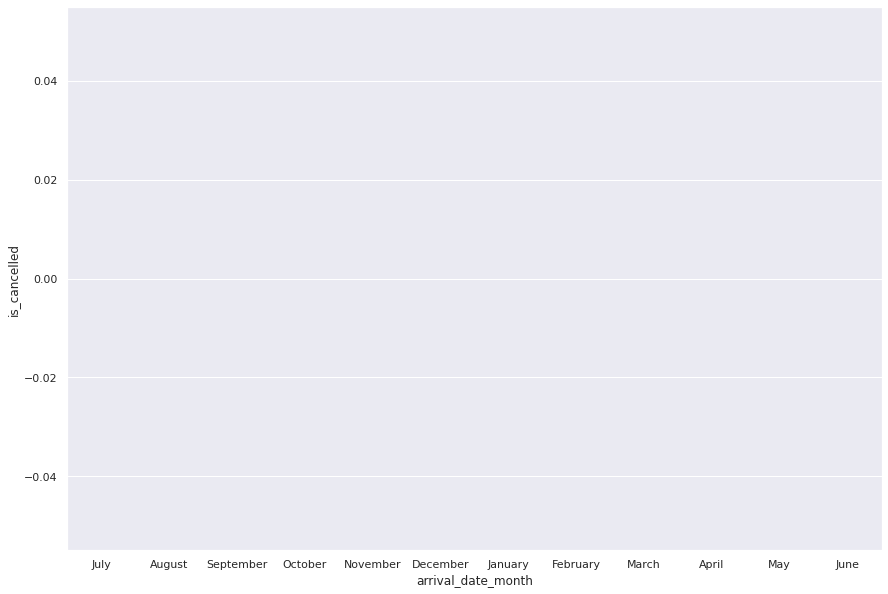

In [ ]:
#Percentage of cancellation is unfortunately higher in peak season.

plt.figure(figsize = (13,10))
sns.barplot(x = 'arrival_date_month', y = 'is_cancelled', data = data);

#Data Cleansing - Handle missing values and Remove Outliers

In [ ]:
hotel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 20 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   hotel                            119390 non-null  object 
 1   is_cancelled                     119390 non-null  int64  
 2   lead_time                        119390 non-null  int64  
 3   av_daily_rev                     119390 non-null  int64  
 4   arrival_date_year                119390 non-null  int64  
 5   arrival_date_month               119390 non-null  object 
 6   arrival_date_week_number         119390 non-null  int64  
 7   arrival_date_day_of_month        119390 non-null  int64  
 8   stays_in_weekend_nights          119390 non-null  int64  
 9   stays_in_week_nights             119390 non-null  int64  
 10  adults                           119390 non-null  int64  
 11  children                         119386 non-null  float64
 12  ba

In [ ]:
# Four entries have missing values in children column.
hotel.isnull().sum()

hotel                              0
is_cancelled                       0
lead_time                          0
av_daily_rev                       0
arrival_date_year                  0
arrival_date_month                 0
arrival_date_week_number           0
arrival_date_day_of_month          0
stays_in_weekend_nights            0
stays_in_week_nights               0
adults                             0
children                           4
babies                             0
is_repeated_guest                  0
previous_cancellations             0
previous_bookings_not_cancelled    0
room_type                          0
booking_changes                    0
deposit_type                       0
require_pickup                     0
dtype: int64

In [ ]:
hotel.describe()

is_cancelled      lead_time   av_daily_rev  arrival_date_year  \
count  119390.000000  119390.000000  119390.000000      119390.000000   
mean        0.370416     104.011416    2545.859218        2018.156554   
std         0.482918     106.863097    1263.408092           0.707476   
min         0.000000       0.000000    -160.000000        2017.000000   
25%         0.000000      18.000000    1732.000000        2018.000000   
50%         0.000000      69.000000    2364.500000        2018.000000   
75%         1.000000     160.000000    3150.000000        2019.000000   
max         1.000000     737.000000  135000.000000        2019.000000   

       arrival_date_week_number  arrival_date_day_of_month  \
count             119390.000000              119390.000000   
mean                  27.165173                  15.798241   
std                   13.605138                   8.780829   
min                    1.000000                   1.000000   
25%                   16.000000                   8.000000   
50%                   28.000000                  16.000000   
75%                   38.000000                  23.000000   
max                   53.000000                  31.000000   

       stays_in_weekend_nights  stays_in_week_nights         adults  \
count            119390.000000         119390.000000  119390.000000   
mean                  0.927599              2.500302       1.856403   
std                   0.998613              1.908286       0.579261   
min                   0.000000              0.000000       0.000000   
25%                   0.000000              1.000000       2.000000   
50%                   1.000000              2.000000       2.000000   
75%                   2.000000              3.000000       2.000000   
max                  19.000000             50.000000      55.000000   

            children         babies  is_repeated_guest  \
count  119386.000000  119390.000000      119390.000000   
mean        0.103890       0.007949           0.031912   
std         0.398561       0.097436           0.175767   
min         0.000000       0.000000           0.000000   
25%         0.000000       0.000000           0.000000   
50%         0.000000       0.000000           0.000000   
75%         0.000000       0.000000           0.000000   
max        10.000000      10.000000           1.000000   

       previous_cancellations  previous_bookings_not_cancelled  \
count           119390.000000                    119390.000000   
mean                 0.087118                         0.137097   
std                  0.844336                         1.497437   
min                  0.000000                         0.000000   
25%                  0.000000                         0.000000   
50%                  0.000000                         0.000000   
75%                  0.000000                         0.000000   
max                 26.000000                        72.000000   

       booking_changes  require_pickup  
count    119390.000000   119390.000000  
mean          0.221124        0.062518  
std           0.652306        0.245291  
min           0.000000        0.000000  
25%           0.000000        0.000000  
50%           0.000000        0.000000  
75%           0.000000        0.000000  
max          21.000000        8.000000

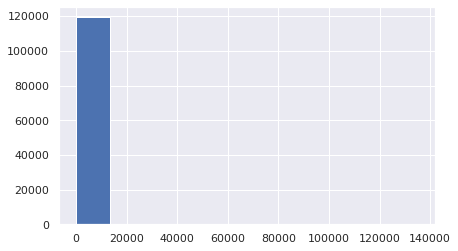

In [ ]:
hotel['av_daily_rev'].hist()

In [ ]:
# The outlier distorted the picture. One datapoint at 135K in HK hotel, not representative. 
# Some entries have zero revenues, and one even is negative.
px.box(data_frame = hotel, x = 'av_daily_rev', color = 'hotel', template = 'plotly_dark')

In [ ]:
# 1960 entries have revenue <= 0. These are probably special cases or wrong data. Need to be removed.

hotel[hotel['av_daily_rev'] <= 0]

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
0        KLN             0        342             0               2017   
1        KLN             0        737             0               2017   
43        HK             0          6             0               2017   
296      KLN             0         32             0               2017   
419      KLN             0        111             0               2017   
...      ...           ...        ...           ...                ...   
118935    HK             1          4             0               2019   
119118    HK             0          0             0               2019   
119182   KLN             0          0             0               2019   
119199   KLN             0         87             0               2019   
119270   KLN             0          1             0               2019   

       arrival_date_month  arrival_date_week_number  \
0                    July                        27   
1                    July                        27   
43                   July                        27   
296                  July                        27   
419                  July                        28   
...                   ...                       ...   
118935             August                        35   
119118             August                        35   
119182             August                        35   
119199             August                        35   
119270             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
0                               1                        0   
1                               1                        0   
43                              1                        0   
296                             4                        0   
419                             6                        0   
...                           ...                      ...   
118935                         28                        1   
119118                         29                        0   
119182                         30                        0   
119199                         30                        2   
119270                         31                        0   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
0                          0       2       0.0       0                  0   
1                          0       2       0.0       0                  0   
43                         2       1       0.0       0                  0   
296                        1       4       0.0       0                  0   
419                        0       2       0.0       0                  0   
...                      ...     ...       ...     ...                ...   
118935                     0       1       0.0       0                  1   
119118                     1       1       0.0       0                  0   
119182                     0       2       0.0       0                  1   
119199                     4       2       0.0       0                  0   
119270                     1       2       0.0       0                  1   

        previous_cancellations  previous_bookings_not_cancelled room_type  \
0                            0                                0         C   
1                            0                                0         C   
43                           0                                0         A   
296                          0                                0         H   
419                          0                                0         A   
...                        ...                              ...       ...   
118935                       0                                3         A   
119118                       0                                0         A   
119182                       0                                0         A   
119199           

In [ ]:
#Do not consider the revenues with 0 or negative. 
df = hotel[hotel['av_daily_rev'] > 0].copy()

# df = hotel.copy()

In [ ]:
df.drop(df[df['av_daily_rev'] > 100_000].index, inplace=True)

In [ ]:
df

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
2        KLN             0          7          1875               2017   
3        KLN             0         13          1875               2017   
4        KLN             0         14          2450               2017   
5        KLN             0         14          2450               2017   
6        KLN             0          0          2675               2017   
...      ...           ...        ...           ...                ...   
119385    HK             0        188          2475               2019   
119386    HK             0        164          2190               2019   
119387    HK             0        102          5636               2019   
119388    HK             0         34          3943               2019   
119389    HK             0        109          2610               2019   

       arrival_date_month  arrival_date_week_number  \
2                    July                        27   
3                    July                        27   
4                    July                        27   
5                    July                        27   
6                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2                               1                        0   
3                               1                        0   
4                               1                        0   
5                               1                        0   
6                               1                        0   
...                           ...                      ...   
119385                         31                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         31                        2   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
2                          1       1       0.0       0                  0   
3                          1       1       0.0       0                  0   
4                          2       2       0.0       0                  0   
5                          2       2       0.0       0                  0   
6                          2       2       0.0       0                  0   
...                      ...     ...       ...     ...                ...   
119385                     3       2       0.0       0                  0   
119386                     4       2       0.0       0                  0   
119387                     5       3       0.0       0                  0   
119388                     5       2       0.0       0                  0   
119389                     5       2       0.0       0                  0   

        previous_cancellations  previous_bookings_not_cancelled room_type  \
2                            0                                0         A   
3                            0                                0         A   
4                            0                                0         A   
5                            0                                0         A   
6                            0                                0         C   
...                        ...                              ...       ...   
119385                       0                                0         A   
119386                       0                                0         A   
119387                       0                                0         E   
119388           

In [ ]:
px.box(data_frame = df, x = 'av_daily_rev', color = 'hotel', template = 'plotly_dark')

In [ ]:
kln = df[df['hotel'] == 'KLN']
hk = df[df['hotel'] == 'HK']

In [ ]:
# Set price type category


hk_q1 = hk['av_daily_rev'].quantile(q=0.25)

hk_q3 = hk['av_daily_rev'].quantile(q=0.75)


kln["price_type"] = pd.cut(df[df['hotel'] == 'KLN']["av_daily_rev"],
                               bins=[0, 1300, 3160, 5950, np.inf],
                                labels=['budget', 'medium', 'high end', 'luxury'])

                              #  labels=['sponsor','budget', 'medium', 'high end', 'luxury'])

hk["price_type"] = pd.cut(df[df['hotel'] == 'HK']["av_daily_rev"],
                               bins=[-np.inf, 2000, 3150, 4975, np.inf],
                               labels=['budget', 'medium', 'high end', 'luxury'])

In [ ]:
hk.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78121 entries, 44 to 119389
Data columns (total 21 columns):
 #   Column                           Non-Null Count  Dtype   
---  ------                           --------------  -----   
 0   hotel                            78121 non-null  object  
 1   is_cancelled                     78121 non-null  int64   
 2   lead_time                        78121 non-null  int64   
 3   av_daily_rev                     78121 non-null  int64   
 4   arrival_date_year                78121 non-null  int64   
 5   arrival_date_month               78121 non-null  object  
 6   arrival_date_week_number         78121 non-null  int64   
 7   arrival_date_day_of_month        78121 non-null  int64   
 8   stays_in_weekend_nights          78121 non-null  int64   
 9   stays_in_week_nights             78121 non-null  int64   
 10  adults                           78121 non-null  int64   
 11  children                         78117 non-null  float64 
 12  ba

In [ ]:
hk_cat = hk[['price_type']] 

In [ ]:
# need to encode description 'strings' into a datastructure that is meaningful to computer
# use 'OrdinalEncoder' class in 'preprocessing' module of sklearn
# note that .fit_transform does 2 things together - fitting, then transform
from sklearn.preprocessing import OrdinalEncoder

ordinal_encoder = OrdinalEncoder()
hkprice_encoded = ordinal_encoder.fit_transform(hk[['price_type']])
hkprice_encoded[:10]  # you can see that the encoded is an numpy array

array([[0.],
       [0.],
       [0.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.],
       [3.]])

In [ ]:
hk.groupby('is_cancelled')['price_type'].value_counts()

is_cancelled          
0             medium      23030
              budget      10700
              high end    10253
              luxury       1166
1             medium      15227
              budget       9828
              high end     7246
              luxury        671
Name: price_type, dtype: int64

In [ ]:
kln["price_type"].value_counts()

medium      19651
budget       9831
high end     8500
luxury       1326
Name: price_type, dtype: int64

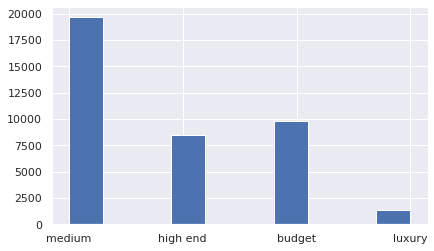

In [ ]:
kln["price_type"].hist()

In [ ]:
hk['price_type'] = hkprice_encoded

In [ ]:
hk.corr()

is_cancelled  lead_time  av_daily_rev  \
is_cancelled                         1.000000   0.305931     -0.044079   
lead_time                            0.305931   1.000000     -0.192452   
av_daily_rev                        -0.044079  -0.192452      1.000000   
arrival_date_year                   -0.006942   0.023938      0.278851   
arrival_date_week_number             0.003492   0.133697      0.029006   
arrival_date_day_of_month           -0.004941   0.013848      0.023124   
stays_in_weekend_nights             -0.012102  -0.031559      0.025614   
stays_in_week_nights                 0.043616   0.050713      0.041459   
adults                               0.044319   0.108217      0.266265   
children                            -0.028171  -0.054752      0.365222   
babies                              -0.029296  -0.029299      0.022187   
is_repeated_guest                   -0.049138  -0.088557     -0.105276   
previous_cancellations               0.171102   0.128608     -0.146720   
previous_bookings_not_cancelled     -0.048389  -0.058856     -0.062151   
booking_changes                     -0.150096  -0.029173      0.046911   
require_pickup                      -0.133834  -0.077491      0.075189   
price_type                          -0.061830  -0.039804      0.172207   

                                 arrival_date_year  arrival_date_week_number  \
is_cancelled                             -0.006942                  0.003492   
lead_time                                 0.023938                  0.133697   
av_daily_rev                              0.278851                  0.029006   
arrival_date_year                         1.000000                 -0.541504   
arrival_date_week_number                 -0.541504                  1.000000   
arrival_date_day_of_month                -0.003198                  0.062854   
stays_in_weekend_nights                   0.033118                 -0.000130   
stays_in_week_nights                      0.065673                 -0.007282   
adults                                    0.063639                  0.009776   
children                                  0.055393                 -0.001796   
babies                                   -0.006707                  0.003625   
is_repeated_guest                        -0.031587                  0.003934   
previous_cancellations                   -0.203012                  0.038416   
previous_bookings_not_cancelled           0.020707                 -0.011040   
booking_changes                           0.034200                  0.003709   
require_pickup                           -0.002948                 -0.002259   
price_type                                0.135834                  0.011758   

                                 arrival_date_day_of_month  \
is_cancelled                                     -0.004941   
lead_time                                         0.013848   
av_daily_rev                                      0.023124   
arrival_date_year                                -0.003198   
arrival_date_week_number                          0.062854   
arrival_date_day_of_month                         1.000000   
stays_in_weekend_nights                           0.000342   
stays_in_week_nights                             -0.012363   
adults                                           -0.002000   
children                                          0.012237   
babies                                           -0.000037   
is_repeated_guest                                -0.010337   
previous_cancellations                           -0.009848   
previous_bookings_not_cancelled                   0.000534   
booking_changes                                   0.015336   
require_pickup                                    0.003840   
price_type                                       -0.005456   

                                 stays_in_weekend_nights  \
is_cancelled                                   -0.012102   
lead_time             

In [ ]:
hk["price_type"].value_counts()

3.0    38257
0.0    20528
1.0    17499
2.0     1837
Name: price_type, dtype: int64

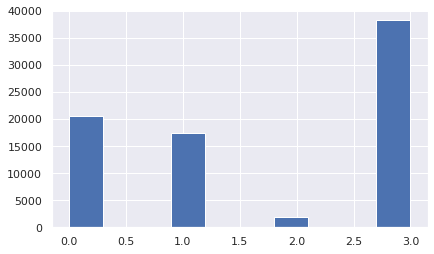

In [ ]:
hk["price_type"].hist()

In [ ]:
#Distribution of lead time
px.box(data_frame = hotel, x = 'lead_time', color = 'hotel', template = 'plotly_dark')

In [ ]:
# df.groupby("lead_time")["is_cancelled"].describe()

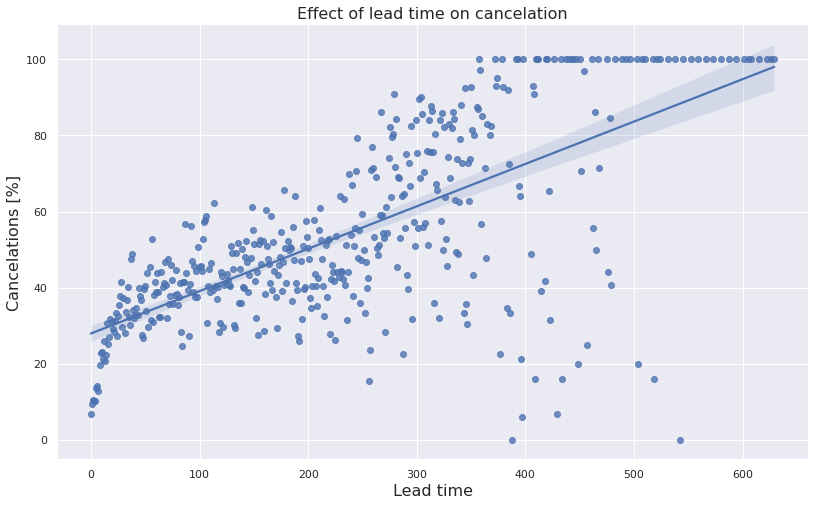

In [ ]:
#Looking at the distribution, longer lead time is not outliters. 

# group data for lead_time:
lead_cancel_data = df.groupby("lead_time")["is_cancelled"].describe()
# use only lead_times wih more than 10 bookings for graph:
lead_cancel_data_10 = lead_cancel_data.loc[lead_cancel_data["count"] >= 10]

#show figure:
plt.figure(figsize=(12, 8))
sns.regplot(x=lead_cancel_data_10.index, y=lead_cancel_data_10["mean"].values * 100)
plt.title("Effect of lead time on cancelation", fontsize=16)
plt.xlabel("Lead time", fontsize=16)
plt.ylabel("Cancelations [%]", fontsize=16)
# plt.xlim(0,365)
plt.show()

In [ ]:
hotel[hotel['lead_time']>600]

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
1       KLN             0        737             0               2017   
27239   KLN             0        709          1700               2018   
67550    HK             1        605          1500               2018   
67551    HK             1        605          1500               2018   
67554    HK             1        605          1500               2018   
...     ...           ...        ...           ...                ...   
91350    HK             1        629          1550               2019   
91351    HK             1        629          1550               2019   
91352    HK             1        629          1550               2019   
91353    HK             1        629          1550               2019   
91354    HK             1        629          1550               2019   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
1                   July                        27                          1   
27239           February                         9                         25   
67550            October                        43                         17   
67551            October                        43                         17   
67554            October                        43                         17   
...                  ...                       ...                        ...   
91350              March                        13                         30   
91351              March                        13                         30   
91352              March                        13                         30   
91353              March                        13                         30   
91354              March                        13                         30   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
1                            0                     0       2       0.0   
27239                        8                    20       2       0.0   
67550                        1                     2       2       0.0   
67551                        1                     2       2       0.0   
67554                        1                     2       2       0.0   
...                        ...                   ...     ...       ...   
91350                        0                     2       2       0.0   
91351                        0                     2       2       0.0   
91352                        0                     2       2       0.0   
91353                        0                     2       2       0.0   
91354                        0                     2       2       0.0   

       babies  is_repeated_guest  previous_cancellations  \
1           0                  0                       0   
27239       0                  0                       0   
67550       0                  0                       0   
67551       0                  0                       0   
67554       0                  0                       0   
...       ...                ...                     ...   
91350       0                  0                       0   
91351       0                  0                       0   
91352       0                  0                       0   
91353       0                  0                       0   
91354       0                  0                       0   

       previous_bookings_not_cancelled room_type  booking_changes  \
1                                    0         C                4   
27239                                0         E                2   
67550                                0         A                0   
67551                                0         A                0   
67554                                0         A                0   
...                                ...       ...              ...   
91350                                0         A               

In [ ]:
#Distribution of stay in weekend nights
px.box(data_frame = hotel, x = 'stays_in_weekend_nights', color = 'hotel', template = 'plotly_dark')

In [ ]:
#Distribution of stay in week nights  
px.box(data_frame = hotel, x = 'stays_in_week_nights', color = 'hotel', template = 'plotly_dark')

In [ ]:
#Outliers of number of adults, children and babies. Zero adults are probably wrong data. Adults > 6 may not be representative, or wrong data. 
px.box(data_frame = hotel, x = 'adults', color = 'hotel', template = 'plotly_dark')

In [ ]:
# Interestingly, some bookings have up to 40 adults and all are cancelled. These data are either error or very extreme cases. 
hotel[(hotel['adults']>6)]

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
6688    KLN             1        304             0               2017   
7030    KLN             1        333             0               2017   
7632    KLN             1        336             0               2017   
8432    KLN             1        340             0               2017   
9801    KLN             1        347             0               2017   
10125   KLN             1        349             0               2017   
10603   KLN             1        352             0               2017   
11102   KLN             1        354             0               2017   
11644   KLN             1        361             0               2017   
12318   KLN             1        338             0               2017   
12736   KLN             1        328             0               2017   
13827   KLN             1        334             0               2017   
13828   KLN             1        334             0               2017   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
6688           September                        36                          3   
7030           September                        36                          5   
7632           September                        37                          7   
8432           September                        37                         12   
9801           September                        38                         19   
10125          September                        39                         21   
10603          September                        39                         24   
11102          September                        39                         26   
11644            October                        40                          3   
12318            October                        41                          4   
12736            October                        41                          6   
13827            October                        42                         12   
13828            October                        42                         12   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
6688                         0                     3      40       0.0   
7030                         2                     5      26       0.0   
7632                         1                     2      50       0.0   
8432                         2                     5      26       0.0   
9801                         2                     5      26       0.0   
10125                        1                     3      27       0.0   
10603                        1                     3      27       0.0   
11102                        2                     5      26       0.0   
11644                        2                     5      26       0.0   
12318                        2                     0      55       0.0   
12736                        2                     5      20       0.0   
13827                        2                     5      10       0.0   
13828                        2                     5      20       0.0   

       babies  is_repeated_guest  previous_cancellations  \
6688        0                  0                       0   
7030        0                  0                       0   
7632        0                  0                       0   
8432        0                  0                       0   
9801        0                  0                       0   
10125       0                  0                       0   
10603       0                  0                       0   
11102       0                  0                       0   
11644       0                  0                       0   
12318       0                  0                       0   
12736       0                  0                       0   
13827       0                  0                       0   
13828       0                  

In [ ]:
df.drop(df[(df['adults']>6)].index, inplace=True)

In [ ]:
df

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
2        KLN             0          7          1875               2017   
3        KLN             0         13          1875               2017   
4        KLN             0         14          2450               2017   
5        KLN             0         14          2450               2017   
6        KLN             0          0          2675               2017   
...      ...           ...        ...           ...                ...   
119385    HK             0        188          2475               2019   
119386    HK             0        164          2190               2019   
119387    HK             0        102          5636               2019   
119388    HK             0         34          3943               2019   
119389    HK             0        109          2610               2019   

       arrival_date_month  arrival_date_week_number  \
2                    July                        27   
3                    July                        27   
4                    July                        27   
5                    July                        27   
6                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2                               1                        0   
3                               1                        0   
4                               1                        0   
5                               1                        0   
6                               1                        0   
...                           ...                      ...   
119385                         31                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         31                        2   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
2                          1       1       0.0       0                  0   
3                          1       1       0.0       0                  0   
4                          2       2       0.0       0                  0   
5                          2       2       0.0       0                  0   
6                          2       2       0.0       0                  0   
...                      ...     ...       ...     ...                ...   
119385                     3       2       0.0       0                  0   
119386                     4       2       0.0       0                  0   
119387                     5       3       0.0       0                  0   
119388                     5       2       0.0       0                  0   
119389                     5       2       0.0       0                  0   

        previous_cancellations  previous_bookings_not_cancelled room_type  \
2                            0                                0         A   
3                            0                                0         A   
4                            0                                0         A   
5                            0                                0         A   
6                            0                                0         C   
...                        ...                              ...       ...   
119385                       0                                0         A   
119386                       0                                0         A   
119387                       0                                0         E   
119388           

In [ ]:
hotel[(hotel['adults']==0)]

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
1993      HK             0        132             0               2017   
2306      HK             0        110             0               2017   
3803      HK             0          0             0               2017   
3938      HK             0          1           225               2017   
3974      HK             0          0             0               2017   
...      ...           ...        ...           ...                ...   
116112    HK             1          0             0               2019   
116113    HK             1          0             0               2019   
116354    HK             0         10           150               2019   
116763    HK             1        308          2406               2019   
116932    HK             1        316          2601               2019   

       arrival_date_month  arrival_date_week_number  \
1993                 July                        30   
2306                 July                        30   
3803               August                        33   
3938               August                        33   
3974               August                        33   
...                   ...                       ...   
116112             August                        32   
116113             August                        32   
116354             August                        32   
116763             August                        33   
116932             August                        33   

        arrival_date_day_of_month  stays_in_weekend_nights  \
1993                           23                        2   
2306                           25                        2   
3803                            9                        2   
3938                           10                        1   
3974                           10                        9   
...                           ...                      ...   
116112                         11                        0   
116113                         11                        0   
116354                         12                        2   
116763                         15                        0   
116932                         16                        0   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
1993                       5       0       0.0       0                  0   
2306                       2       0       0.0       0                  0   
3803                       0       0       0.0       0                  0   
3938                       1       0       3.0       0                  0   
3974                      20       0       0.0       0                  0   
...                      ...     ...       ...     ...                ...   
116112                     0       0       0.0       0                  0   
116113                     0       0       0.0       0                  0   
116354                     2       0       3.0       0                  0   
116763                     4       0       2.0       0                  0   
116932                     3       0       2.0       0                  0   

        previous_cancellations  previous_bookings_not_cancelled room_type  \
1993                         0                                0         A   
2306                         0                                0         A   
3803                         0                                0         F   
3938                         0                                0         B   
3974                         0                                0         E   
...                        ...                              ...       ...   
116112                       0                                0         P   
116113                       0                                0         P   
116354                       0                                0         B   
116763           

In [ ]:
# Interestingly, 223 rows have no adults but children or babies only. 

hotel[(hotel['adults']==0) & ((hotel['children'] > 0) | (hotel['babies']>0))]

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
3938      HK             0          1           225               2017   
4107      HK             0        104           150               2017   
4984      HK             0          3           150               2017   
6313      HK             0         15             0               2017   
15143     HK             1         48           150               2017   
...      ...           ...        ...           ...                ...   
115071    HK             0        276          2341               2019   
115257    HK             0        159          3047               2019   
116354    HK             0         10           150               2019   
116763    HK             1        308          2406               2019   
116932    HK             1        316          2601               2019   

       arrival_date_month  arrival_date_week_number  \
3938               August                        33   
4107               August                        33   
4984               August                        34   
6313               August                        35   
15143             October                        43   
...                   ...                       ...   
115071               July                        31   
115257               July                        31   
116354             August                        32   
116763             August                        33   
116932             August                        33   

        arrival_date_day_of_month  stays_in_weekend_nights  \
3938                           10                        1   
4107                           11                        0   
4984                           16                        2   
6313                           28                        0   
15143                          19                        1   
...                           ...                      ...   
115071                         30                        2   
115257                         31                        1   
116354                         12                        2   
116763                         15                        0   
116932                         16                        0   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
3938                       1       0       3.0       0                  0   
4107                       3       0       2.0       0                  0   
4984                       0       0       2.0       0                  0   
6313                       1       0       2.0       0                  0   
15143                      3       0       2.0       0                  0   
...                      ...     ...       ...     ...                ...   
115071                     1       0       2.0       0                  0   
115257                     3       0       2.0       0                  0   
116354                     2       0       3.0       0                  0   
116763                     4       0       2.0       0                  0   
116932                     3       0       2.0       0                  0   

        previous_cancellations  previous_bookings_not_cancelled room_type  \
3938                         0                                0         B   
4107                         0                                0         B   
4984                         0                                0         B   
6313                         0                                0         B   
15143                        0                                0         B   
...                        ...                              ...       ...   
115071                       0                                0         B   
115257                       0                                0         A   
116354                       0                                0         B   
116763           

In [ ]:
# Bookings with no guests.
hotel[(hotel['adults']==0) & (hotel['children'] == 0) & (hotel['babies']==0)]

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
1993      HK             0        132             0               2017   
2306      HK             0        110             0               2017   
3803      HK             0          0             0               2017   
3974      HK             0          0             0               2017   
4115      HK             0          0             0               2017   
...      ...           ...        ...           ...                ...   
111790    HK             0         44          1845               2019   
111857    HK             0          2           572               2019   
113730    HK             0        170             0               2019   
116112    HK             1          0             0               2019   
116113    HK             1          0             0               2019   

       arrival_date_month  arrival_date_week_number  \
1993                 July                        30   
2306                 July                        30   
3803               August                        33   
3974               August                        33   
4115               August                        33   
...                   ...                       ...   
111790               July                        28   
111857               July                        28   
113730               July                        30   
116112             August                        32   
116113             August                        32   

        arrival_date_day_of_month  stays_in_weekend_nights  \
1993                           23                        2   
2306                           25                        2   
3803                            9                        2   
3974                           10                        9   
4115                           11                        0   
...                           ...                      ...   
111790                         15                        1   
111857                         15                        2   
113730                         27                        0   
116112                         11                        0   
116113                         11                        0   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
1993                       5       0       0.0       0                  0   
2306                       2       0       0.0       0                  0   
3803                       0       0       0.0       0                  0   
3974                      20       0       0.0       0                  0   
4115                       4       0       0.0       0                  0   
...                      ...     ...       ...     ...                ...   
111790                     1       0       0.0       0                  0   
111857                     5       0       0.0       0                  0   
113730                     2       0       0.0       0                  0   
116112                     0       0       0.0       0                  0   
116113                     0       0       0.0       0                  0   

        previous_cancellations  previous_bookings_not_cancelled room_type  \
1993                         0                                0         A   
2306                         0                                0         A   
3803                         0                                0         F   
3974                         0                                0         E   
4115                         0                                0         A   
...                        ...                              ...       ...   
111790                       0                                0         A   
111857                       0                                0         A   
113730                       0                                0         A   
116112           

In [ ]:
#Remove entries with 0 adults. Dubious data.

df.drop(df[df['adults']==0].index)

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
2        KLN             0          7          1875               2017   
3        KLN             0         13          1875               2017   
4        KLN             0         14          2450               2017   
5        KLN             0         14          2450               2017   
6        KLN             0          0          2675               2017   
...      ...           ...        ...           ...                ...   
119385    HK             0        188          2475               2019   
119386    HK             0        164          2190               2019   
119387    HK             0        102          5636               2019   
119388    HK             0         34          3943               2019   
119389    HK             0        109          2610               2019   

       arrival_date_month  arrival_date_week_number  \
2                    July                        27   
3                    July                        27   
4                    July                        27   
5                    July                        27   
6                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2                               1                        0   
3                               1                        0   
4                               1                        0   
5                               1                        0   
6                               1                        0   
...                           ...                      ...   
119385                         31                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         31                        2   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
2                          1       1       0.0       0                  0   
3                          1       1       0.0       0                  0   
4                          2       2       0.0       0                  0   
5                          2       2       0.0       0                  0   
6                          2       2       0.0       0                  0   
...                      ...     ...       ...     ...                ...   
119385                     3       2       0.0       0                  0   
119386                     4       2       0.0       0                  0   
119387                     5       3       0.0       0                  0   
119388                     5       2       0.0       0                  0   
119389                     5       2       0.0       0                  0   

        previous_cancellations  previous_bookings_not_cancelled room_type  \
2                            0                                0         A   
3                            0                                0         A   
4                            0                                0         A   
5                            0                                0         A   
6                            0                                0         C   
...                        ...                              ...       ...   
119385                       0                                0         A   
119386                       0                                0         A   
119387                       0                                0         E   
119388           

In [ ]:
# These data with missing value look dubious. They are all cancelled, with very short lead time in August.
hotel[hotel['children'].isnull()]

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
3002    HK             1          2           300               2017   
3216    HK             1          1           300               2017   
3228    HK             1          1           450               2017   
4341    HK             1          8          1913               2017   

     arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
3002             August                        32                          3   
3216             August                        32                          5   
3228             August                        32                          5   
4341             August                        33                         13   

      stays_in_weekend_nights  stays_in_week_nights  adults  children  babies  \
3002                        1                     0       2       NaN       0   
3216                        0                     2       2       NaN       0   
3228                        0                     2       3       NaN       0   
4341                        2                     5       2       NaN       0   

      is_repeated_guest  previous_cancellations  \
3002                  0                       0   
3216                  0                       0   
3228                  0                       0   
4341                  0                       0   

      previous_bookings_not_cancelled room_type  booking_changes deposit_type  \
3002                                0         B                0   No Deposit   
3216                                0         B                0   No Deposit   
3228                                0         B                0   No Deposit   
4341                                0         B                0   No Deposit   

      require_pickup  
3002               0  
3216               0  
3228               0  
4341               0

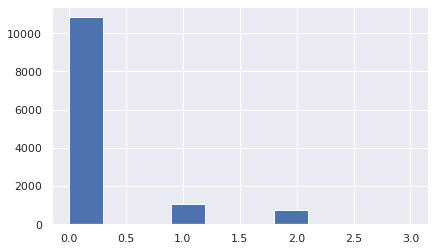

In [ ]:
hotel[(hotel['adults'] > 1) & (hotel['arrival_date_month'] == 'August')]['children'].hist()


In [ ]:
# Enough samples to represent the similar situation.
hotel[(hotel['lead_time'] == 1) & (hotel['is_cancelled'] == 1) & (hotel['arrival_date_month'] == 'August') ].count()

hotel                              32
is_cancelled                       32
lead_time                          32
av_daily_rev                       32
arrival_date_year                  32
arrival_date_month                 32
arrival_date_week_number           32
arrival_date_day_of_month          32
stays_in_weekend_nights            32
stays_in_week_nights               32
adults                             32
children                           30
babies                             32
is_repeated_guest                  32
previous_cancellations             32
previous_bookings_not_cancelled    32
room_type                          32
booking_changes                    32
deposit_type                       32
require_pickup                     32
dtype: int64

In [ ]:
#Drop the missing data.
df.dropna(subset=["children"], inplace=True) 

In [ ]:
#Outliers of number of adults, children and babies. 
px.box(data_frame = hotel, x = 'children', color = 'hotel', template = 'plotly_dark')

In [ ]:
#Outliers of number of adults, children and babies
px.box(data_frame = hotel, x = 'babies', color = 'hotel', template = 'plotly_dark')

In [ ]:
#Entries with more than 9 children or babies are outliers. Only 3 entries.

hotel[(hotel['children']>3) | (hotel['babies'] > 2)]

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
865     KLN             1         55          3329               2017   
13802    HK             0         11          2375               2017   
22748    HK             0         37          2111               2018   

      arrival_date_month  arrival_date_week_number  arrival_date_day_of_month  \
865                 July                        29                         12   
13802            October                        42                         11   
22748            January                         3                         12   

       stays_in_weekend_nights  stays_in_week_nights  adults  children  \
865                          4                    10       2      10.0   
13802                        2                     1       1       0.0   
22748                        0                     2       2       0.0   

       babies  is_repeated_guest  previous_cancellations  \
865         0                  0                       0   
13802       9                  0                       0   
22748      10                  0                       0   

       previous_bookings_not_cancelled room_type  booking_changes  \
865                                  0         D                2   
13802                                0         A                1   
22748                                0         D                1   

      deposit_type  require_pickup  
865     No Deposit               0  
13802   No Deposit               0  
22748   No Deposit               0

In [ ]:
drop_outliers = df[(df['children']>3) | (df['babies'] > 2)]
df.drop(drop_outliers.index, inplace=True)

In [ ]:
df

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
2        KLN             0          7          1875               2017   
3        KLN             0         13          1875               2017   
4        KLN             0         14          2450               2017   
5        KLN             0         14          2450               2017   
6        KLN             0          0          2675               2017   
...      ...           ...        ...           ...                ...   
119385    HK             0        188          2475               2019   
119386    HK             0        164          2190               2019   
119387    HK             0        102          5636               2019   
119388    HK             0         34          3943               2019   
119389    HK             0        109          2610               2019   

       arrival_date_month  arrival_date_week_number  \
2                    July                        27   
3                    July                        27   
4                    July                        27   
5                    July                        27   
6                    July                        27   
...                   ...                       ...   
119385             August                        35   
119386             August                        35   
119387             August                        35   
119388             August                        35   
119389             August                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2                               1                        0   
3                               1                        0   
4                               1                        0   
5                               1                        0   
6                               1                        0   
...                           ...                      ...   
119385                         31                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         31                        2   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
2                          1       1       0.0       0                  0   
3                          1       1       0.0       0                  0   
4                          2       2       0.0       0                  0   
5                          2       2       0.0       0                  0   
6                          2       2       0.0       0                  0   
...                      ...     ...       ...     ...                ...   
119385                     3       2       0.0       0                  0   
119386                     4       2       0.0       0                  0   
119387                     5       3       0.0       0                  0   
119388                     5       2       0.0       0                  0   
119389                     5       2       0.0       0                  0   

        previous_cancellations  previous_bookings_not_cancelled room_type  \
2                            0                                0         A   
3                            0                                0         A   
4                            0                                0         A   
5                            0                                0         A   
6                            0                                0         C   
...                        ...                              ...       ...   
119385                       0                                0         A   
119386                       0                                0         A   
119387                       0                                0         E   
119388           

In [ ]:
#Outliers of previous cancelled or Not cancelled.
px.box(data_frame = hotel, x = 'previous_cancellations', color = 'hotel', template = 'plotly_dark')

In [ ]:
#Some customers keep booking and cancelling. The customers previously cancelled the booking would most likely cancel the recent booking. 
#So those do not need to be considered outliers.
df[df['previous_cancellations'] > 0].groupby('is_cancelled')['previous_cancellations'].count()

is_cancelled
0     485
1    5907
Name: previous_cancellations, dtype: int64

In [ ]:
# Previous bookings not cancelled indicate they are long term customers. Do not need to consider as outliers. 
px.box(data_frame = hotel, x = 'previous_bookings_not_cancelled', color = 'hotel', template = 'plotly_dark')

In [ ]:
# Room type P is all cancelled and have no revenue.

hotel[hotel['room_type'] == 'P']

hotel  is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
25960    KLN             1          0             0               2018   
73178     HK             1          0             0               2018   
73671    KLN             1          0             0               2018   
75661     HK             1          0             0               2018   
75662     HK             1          0             0               2018   
75666     HK             1          0             0               2018   
93249     HK             1          0             0               2019   
93250     HK             1          0             0               2019   
93251     HK             1          0             0               2019   
93252     HK             1          0             0               2019   
116112    HK             1          0             0               2019   
116113    HK             1          0             0               2019   

       arrival_date_month  arrival_date_week_number  \
25960            February                         8   
73178            November                        47   
73671            November                        48   
75661            December                        50   
75662            December                        50   
75666            December                        50   
93249               April                        15   
93250               April                        15   
93251               April                        15   
93252               April                        15   
116112             August                        32   
116113             August                        32   

        arrival_date_day_of_month  stays_in_weekend_nights  \
25960                          15                        0   
73178                          17                        4   
73671                          21                        0   
75661                           6                        0   
75662                           6                        0   
75666                           6                        0   
93249                          10                        0   
93250                          10                        0   
93251                          10                        0   
93252                          10                        0   
116112                         11                        0   
116113                         11                        0   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
25960                      0       0       0.0       0                  0   
73178                     11       0       0.0       0                  0   
73671                      0       0       0.0       0                  0   
75661                      0       0       0.0       0                  0   
75662                      0       0       0.0       0                  0   
75666                      0       0       0.0       0                  0   
93249                      0       0       0.0       0                  0   
93250                      0       0       0.0       0                  0   
93251                      0       0       0.0       0                  0   
93252                      0       0       0.0       0                  0   
116112                     0       0       0.0       0                  0   
116113                     0       0       0.0       0                  0   

        previous_cancellations  previous_bookings_not_cancelled room_type  \
25960                        0                                0         P   
73178                        0                                0         P   
73671                        0                                0         P   
75661                        0                                0         P   
75662                        0                                0         P   
75666                        0                           

In [ ]:
# Drop room type P. 
df.drop(df[df['room_type'] == 'P'].index, inplace=True)

#Kolmogorov–Smirnov test --- HK and KLN Hotel

####Test the data patterns between HK and KLN hotels.
- Set a null hypothesis that there is no difference in patterns between HK and KLN hotels.
- Use Kolmogorov–Smirnov test to test against the data.
- p-value of 0.00 for the lead time shows that the null hypothesis needs to be rejected. 

In [ ]:
hotel['hotel'].value_counts()

HK     79330
KLN    40060
Name: hotel, dtype: int64

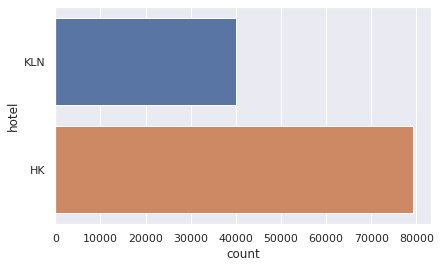

In [ ]:
sns.countplot(y = 'hotel' , data = hotel)
plt.show()

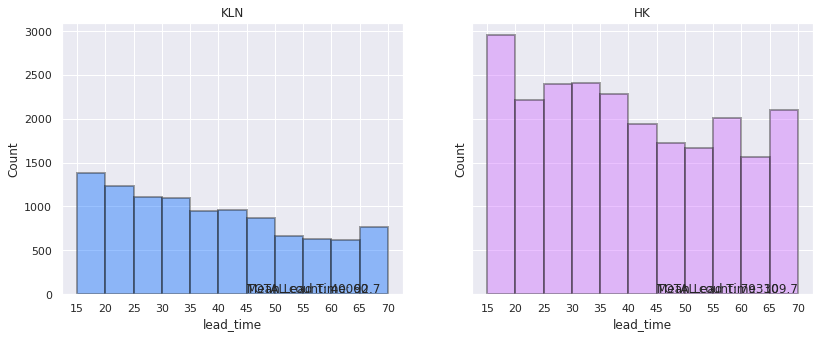

In [ ]:
kln_lead_time = hotel[hotel['hotel']=='KLN']['lead_time'] # subset with males age
hk_lead_time = hotel[hotel['hotel']=='HK']['lead_time'] # subset with females age

age_bins = range(15,75,5)

# males histogram
fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(12,5), sharey=True)
sns.distplot(kln_lead_time, bins=age_bins, kde=False, color='#0066ff', ax=ax1, hist_kws=dict(edgecolor="k", linewidth=2))
ax1.set_xticks(age_bins)
# ax1.set_ylim(top=25)
ax1.set_title('KLN')
ax1.set_ylabel('Count')
ax1.text(45,23, "TOTAL count: {}".format(kln_lead_time.count()))
ax1.text(45,22, "Mean Lead Time: {:.1f}".format(kln_lead_time.mean()))

# females histogram
sns.distplot(hk_lead_time, bins=age_bins, kde=False, color='#cc66ff', ax=ax2, hist_kws=dict(edgecolor="k", linewidth=2))
ax2.set_xticks(age_bins)
ax2.set_title('HK')
ax2.set_ylabel('Count')
ax2.text(45,23, "TOTAL count: {}".format(hk_lead_time.count()))
ax2.text(45,22, "Mean Lead Time: {:.1f}".format(hk_lead_time.mean()))

plt.show()

In [ ]:
from scipy import stats

print('Kolmogorov–Smirnov test p-value: {:.2f}'.format(stats.ks_2samp(kln_lead_time, hk_lead_time)[1]))

# p-value of 0.00.

# Null hypothesis is rejected. KLN and HK hotels need to be treated as two different datasets. 


Kolmogorov–Smirnov test p-value: 0.00


#Transforming Data for ML --- Scaling and Handling Text and Categorical Attributes

In [ ]:
# creating numerical and categorical dataframes

cat_cols = [col for col in df.columns if df[col].dtype == 'O']
cat_cols

['hotel', 'arrival_date_month', 'room_type', 'deposit_type']

In [ ]:
cat_df = df[cat_cols]
cat_df.head()

hotel arrival_date_month room_type deposit_type
2   KLN               July         A   No Deposit
3   KLN               July         A   No Deposit
4   KLN               July         A   No Deposit
5   KLN               July         A   No Deposit
6   KLN               July         C   No Deposit

In [ ]:
cat_df.isnull().any()

hotel                 False
arrival_date_month    False
room_type             False
deposit_type          False
dtype: bool

In [ ]:
# cat_df['reservation_status_date'] = pd.to_datetime(cat_df['reservation_status_date'])

# cat_df['year'] = cat_df['reservation_status_date'].dt.year
# cat_df['month'] = cat_df['reservation_status_date'].dt.month
# cat_df['day'] = cat_df['reservation_status_date'].dt.day


In [ ]:
# printing unique values of each column
for col in cat_df.columns:
    print(f"{col}: \n{cat_df[col].unique()}\n")

hotel: 
['KLN' 'HK']

arrival_date_month: 
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']

room_type: 
['A' 'C' 'D' 'E' 'G' 'F' 'H' 'B' 'L']

deposit_type: 
['No Deposit' 'Non Refund' 'Refundable']



In [ ]:
# # use OneHotEncoder in sklearn solves the problem!
# # it generate a sparse matrix, each row has a '1' in the category it belongs to
# # and '0' elsewhere, hence sparse matrix is more efficient to store the information
# from sklearn.preprocessing import OneHotEncoder

# cat_encoder = OneHotEncoder()
# cat_tr = cat_encoder.fit_transform(cat_df)
# cat_tr.toarray()

In [ ]:
# # encoding categorical variables manually for easy recognization.

cat_df['hotel'] = cat_df['hotel'].map({'HK' : 0, 'KLN' : 1})


cat_df['room_type'] = cat_df['room_type'].map({'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6,
                                                                   'H': 7, 'L': 8})

cat_df['deposit_type'] = cat_df['deposit_type'].map({'No Deposit': 0, 'Refundable': 1, 'Non Refund': 2})

cat_df['arrival_date_month'] = cat_df['arrival_date_month'].map({'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12, 'January':1,
 'February':2, 'March':3, 'April':4, 'May':5, 'June':6})

# cat_df['customer_type'] = cat_df['customer_type'].map({'Transient': 0, 'Contract': 1, 'Transient-Party': 2, 'Group': 3})

# cat_df['year'] = cat_df['year'].map({2015: 0, 2014: 1, 2016: 2, 2017: 3})


In [ ]:
cat_df

hotel  arrival_date_month  room_type  deposit_type
2           1                   7          0             0
3           1                   7          0             0
4           1                   7          0             0
5           1                   7          0             0
6           1                   7          2             0
...       ...                 ...        ...           ...
119385      0                   8          0             0
119386      0                   8          0             0
119387      0                   8          4             0
119388      0                   8          3             0
119389      0                   8          0             0

[117422 rows x 4 columns]

In [ ]:
cat_df.isnull().any()

hotel                 False
arrival_date_month    False
room_type             False
deposit_type          False
dtype: bool

In [ ]:
df.isnull().any()

hotel                              False
is_cancelled                       False
lead_time                          False
av_daily_rev                       False
arrival_date_year                  False
arrival_date_month                 False
arrival_date_week_number           False
arrival_date_day_of_month          False
stays_in_weekend_nights            False
stays_in_week_nights               False
adults                             False
children                           False
babies                             False
is_repeated_guest                  False
previous_cancellations             False
previous_bookings_not_cancelled    False
room_type                          False
booking_changes                    False
deposit_type                       False
require_pickup                     False
dtype: bool

In [ ]:
num_df = df.drop(columns = cat_cols, axis = 1)
# is_cancelled = df['is_cancelled']
# num_df.drop('is_cancelled', axis = 1, inplace = True)
num_df

is_cancelled  lead_time  av_daily_rev  arrival_date_year  \
2                  0          7          1875               2017   
3                  0         13          1875               2017   
4                  0         14          2450               2017   
5                  0         14          2450               2017   
6                  0          0          2675               2017   
...              ...        ...           ...                ...   
119385             0        188          2475               2019   
119386             0        164          2190               2019   
119387             0        102          5636               2019   
119388             0         34          3943               2019   
119389             0        109          2610               2019   

        arrival_date_week_number  arrival_date_day_of_month  \
2                             27                          1   
3                             27                          1   
4                             27                          1   
5                             27                          1   
6                             27                          1   
...                          ...                        ...   
119385                        35                         31   
119386                        35                         31   
119387                        35                         31   
119388                        35                         31   
119389                        35                         31   

        stays_in_weekend_nights  stays_in_week_nights  adults  children  \
2                             0                     1       1       0.0   
3                             0                     1       1       0.0   
4                             0                     2       2       0.0   
5                             0                     2       2       0.0   
6                             0                     2       2       0.0   
...                         ...                   ...     ...       ...   
119385                        2                     3       2       0.0   
119386                        2                     4       2       0.0   
119387                        2                     5       3       0.0   
119388                        2                     5       2       0.0   
119389                        2                     5       2       0.0   

        babies  is_repeated_guest  previous_cancellations  \
2            0                  0                       0   
3            0                  0                       0   
4            0                  0                       0   
5            0                  0                       0   
6            0                  0                       0   
...        ...                ...                     ...   
119385       0                  0                       0   
119386       0                  0                       0   
119387       0                  0                       0   
119388       0                  0                       0   
119389       0                  0                       0   

        previous_bookings_not_cancelled  booking_changes  require_pickup  
2                                     0                0               0  
3                                     0                0               0  
4                                     0                0               0  
5                                     0                0               0  
6                                     0                0               0  
...                                 ...              ...             ...  
119385                                0                0               0  
119386                                0                0               0  
119387                                0                0               0  
119388                                0           

In [ ]:
# num_df.style.format("{:.2%}")
num_df.var()

is_cancelled                       2.343168e-01
lead_time                          1.142935e+04
av_daily_rev                       1.363495e+06
arrival_date_year                  4.991982e-01
arrival_date_week_number           1.843022e+02
arrival_date_day_of_month          7.715195e+01
stays_in_weekend_nights            9.914765e-01
stays_in_week_nights               3.585873e+00
adults                             2.324196e-01
children                           1.589283e-01
babies                             7.903398e-03
is_repeated_guest                  2.709710e-02
previous_cancellations             7.203231e-01
previous_bookings_not_cancelled    2.091646e+00
booking_changes                    4.009102e-01
require_pickup                     6.030588e-02
dtype: float64

In [ ]:
data_df = pd.concat([cat_df, num_df], axis = 1)

In [ ]:
data_df

hotel  arrival_date_month  room_type  deposit_type  is_cancelled  \
2           1                   7          0             0             0   
3           1                   7          0             0             0   
4           1                   7          0             0             0   
5           1                   7          0             0             0   
6           1                   7          2             0             0   
...       ...                 ...        ...           ...           ...   
119385      0                   8          0             0             0   
119386      0                   8          0             0             0   
119387      0                   8          4             0             0   
119388      0                   8          3             0             0   
119389      0                   8          0             0             0   

        lead_time  av_daily_rev  arrival_date_year  arrival_date_week_number  \
2               7          1875               2017                        27   
3              13          1875               2017                        27   
4              14          2450               2017                        27   
5              14          2450               2017                        27   
6               0          2675               2017                        27   
...           ...           ...                ...                       ...   
119385        188          2475               2019                        35   
119386        164          2190               2019                        35   
119387        102          5636               2019                        35   
119388         34          3943               2019                        35   
119389        109          2610               2019                        35   

        arrival_date_day_of_month  stays_in_weekend_nights  \
2                               1                        0   
3                               1                        0   
4                               1                        0   
5                               1                        0   
6                               1                        0   
...                           ...                      ...   
119385                         31                        2   
119386                         31                        2   
119387                         31                        2   
119388                         31                        2   
119389                         31                        2   

        stays_in_week_nights  adults  children  babies  is_repeated_guest  \
2                          1       1       0.0       0                  0   
3                          1       1       0.0       0                  0   
4                          2       2       0.0       0                  0   
5                          2       2       0.0       0                  0   
6                          2       2       0.0       0                  0   
...                      ...     ...       ...     ...                ...   
119385                     3       2       0.0       0                  0   
119386                     4       2       0.0       0                  0   
119387                     5       3       0.0       0                  0   
119388                     5       2       0.0       0                  0   
119389                     5       2       0.0       0                  0   

        previous_cancellations  previous_bookings_not_cancelled  \
2                            0                                0   
3                            0                                0   
4                            0                                0   
5                            0                                0   
6                            0                                0   
...                        ...                              ..

In [ ]:
# HK hotel Correlation Analysis
data_df[data_df['hotel']==0].corr()['is_cancelled'].sort_values(ascending=False)

is_cancelled                       1.000000
deposit_type                       0.518141
lead_time                          0.305995
previous_cancellations             0.171117
adults                             0.044261
stays_in_week_nights               0.043608
arrival_date_month                 0.005991
arrival_date_week_number           0.003461
arrival_date_day_of_month         -0.004888
arrival_date_year                 -0.006863
stays_in_weekend_nights           -0.012095
children                          -0.028176
babies                            -0.032791
av_daily_rev                      -0.043973
previous_bookings_not_cancelled   -0.048388
is_repeated_guest                 -0.049135
room_type                         -0.066716
require_pickup                    -0.133834
booking_changes                   -0.150058
hotel                                   NaN
Name: is_cancelled, dtype: float64

In [ ]:
# KLN hotel Correlation Analysis
data_df[data_df['hotel']==1].corr()['is_cancelled'].sort_values(ascending=False)

is_cancelled                       1.000000
deposit_type                       0.317873
lead_time                          0.227537
previous_cancellations             0.114277
av_daily_rev                       0.101269
adults                             0.091541
children                           0.081458
stays_in_weekend_nights            0.074049
stays_in_week_nights               0.072934
arrival_date_year                  0.043418
room_type                          0.026533
arrival_date_month                 0.025739
arrival_date_week_number           0.022187
arrival_date_day_of_month         -0.009037
babies                            -0.024027
previous_bookings_not_cancelled   -0.076962
is_repeated_guest                 -0.098951
booking_changes                   -0.114672
require_pickup                    -0.246805
hotel                                   NaN
Name: is_cancelled, dtype: float64

In [ ]:
data_df.columns

Index(['hotel', 'arrival_date_month', 'room_type', 'deposit_type',
       'is_cancelled', 'lead_time', 'av_daily_rev', 'arrival_date_year',
       'arrival_date_week_number', 'arrival_date_day_of_month',
       'stays_in_weekend_nights', 'stays_in_week_nights', 'adults', 'children',
       'babies', 'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_cancelled', 'booking_changes', 'require_pickup'],
      dtype='object')

In [ ]:
plt.figure(figsize = (20 , 200))
n = 0 
for x in data_df.columns:
    for y in data_df.columns:
        n += 1
        plt.subplot(80 , 5 , n)
        plt.subplots_adjust(hspace = 0.5 , wspace = 0.5)
        sns.regplot(x = x , y = y , data = data_df)
        plt.ylabel(y.split()[0]+' '+y.split()[1] if len(y.split()) > 1 else y )
plt.show()

In [ ]:
list(cat_df)

['hotel', 'arrival_date_month', 'room_type', 'deposit_type']

In [ ]:
df_label = df['is_cancelled'].copy()
df.drop(['is_cancelled'], axis = 1, inplace=True )
num_df.drop(['is_cancelled'], axis = 1, inplace=True )

In [ ]:
cat_attribs = list(cat_df)
cat_attribs

['hotel', 'arrival_date_month', 'room_type', 'deposit_type']

In [ ]:
list(num_df)

['is_cancelled',
 'lead_time',
 'av_daily_rev',
 'arrival_date_year',
 'arrival_date_week_number',
 'arrival_date_day_of_month',
 'stays_in_weekend_nights',
 'stays_in_week_nights',
 'adults',
 'children',
 'babies',
 'is_repeated_guest',
 'previous_cancellations',
 'previous_bookings_not_cancelled',
 'booking_changes',
 'require_pickup']

In [ ]:
# use sklearn's 'ColumnTransform' to construct the full_pipeline

from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

num_attribs = list(num_df)
cat_attribs = list(cat_df)

full_pipeline = ColumnTransformer([
        ("num", StandardScaler(), num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
    ])

df_tr = full_pipeline.fit_transform(df)

In [ ]:
df_label.to_numpy()

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
X = df_tr
y = df_label.to_numpy()

X



array([[-0.91752248, -0.610001  , -1.64228755, ...,  1.        ,
         0.        ,  0.        ],
       [-0.8613993 , -0.610001  , -1.64228755, ...,  1.        ,
         0.        ,  0.        ],
       [-0.85204544, -0.11757287, -1.64228755, ...,  1.        ,
         0.        ,  0.        ],
       ...,
       [-0.02890551,  2.61090718,  1.18842224, ...,  1.        ,
         0.        ,  0.        ],
       [-0.66496818,  1.16102748,  1.18842224, ...,  1.        ,
         0.        ,  0.        ],
       [ 0.03657153,  0.01945061,  1.18842224, ...,  1.        ,
         0.        ,  0.        ]])

In [ ]:
# splitting data into training set and test set

# Need to use stratified

#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state=666)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
# # yes, you need to stratify, use StratifiedShuffleSplit class in sklearn
# from sklearn.model_selection import StratifiedShuffleSplit

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
# for train_index, test_index in split.split(hotel, hotel["is_cancelled"]):
#     X_train = hotel.loc[train_index]
#     X_test = hotel.loc[test_index]

In [ ]:
# X_train

In [ ]:
# X_train.describe()

#Model Building

In [ ]:
import random
random.seed(666)
np.random.seed(666)
from sklearn.metrics import roc_auc_score

In [ ]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

y_pred_lr = lr.predict(X_test)

acc_lr = accuracy_score(y_test, y_pred_lr)
conf = confusion_matrix(y_test, y_pred_lr)
clf_report = classification_report(y_test, y_pred_lr)
roc_score = roc_auc_score(y_test,y_pred_lr)

print(f"Accuracy Score of Logistic Regression is : {acc_lr}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")
print(f"roc_auc_score: \n{roc_score}")

Accuracy Score of Logistic Regression is : 0.7678201379623584
Confusion Matrix : 
[[21414   639]
 [ 7540  5634]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.74      0.97      0.84     22053
           1       0.90      0.43      0.58     13174

    accuracy                           0.77     35227
   macro avg       0.82      0.70      0.71     35227
weighted avg       0.80      0.77      0.74     35227

roc_auc_score: 
0.6993424469616378


In [ ]:
rd_clf = RandomForestClassifier()
rd_clf.fit(X_train, y_train)

y_pred_rd_clf = rd_clf.predict(X_test)

acc_rd_clf = accuracy_score(y_test, y_pred_rd_clf)
conf = confusion_matrix(y_test, y_pred_rd_clf)
clf_report = classification_report(y_test, y_pred_rd_clf)

print(f"Accuracy Score of Random Forest is : {acc_rd_clf}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

roc_score = roc_auc_score(y_test,y_pred_rd_clf)
print(f"roc_auc_score: \n{roc_score}")

Accuracy Score of Random Forest is : 0.8266102705311267
Confusion Matrix : 
[[20119  1934]
 [ 4174  9000]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.83      0.91      0.87     22053
           1       0.82      0.68      0.75     13174

    accuracy                           0.83     35227
   macro avg       0.83      0.80      0.81     35227
weighted avg       0.83      0.83      0.82     35227

roc_auc_score: 
0.7977329943043834


In [ ]:
xgb = XGBClassifier(booster = 'gbtree', learning_rate = 0.1, max_depth = 5, n_estimators = 180)
xgb.fit(X_train, y_train)

y_pred_xgb = xgb.predict(X_test)

acc_xgb = accuracy_score(y_test, y_pred_xgb)
conf = confusion_matrix(y_test, y_pred_xgb)
clf_report = classification_report(y_test, y_pred_xgb)

print(f"Accuracy Score of XG Boost Classifier is : {acc_xgb}")
print(f"Confusion Matrix : \n{conf}")
print(f"Classification Report : \n{clf_report}")

roc_score = roc_auc_score(y_test,y_pred_xgb)
print(f"roc_auc_score: \n{roc_score}")

Accuracy Score of XG Boost Classifier is : 0.7882306185596275
Confusion Matrix : 
[[21249   804]
 [ 6656  6518]]
Classification Report : 
              precision    recall  f1-score   support

           0       0.76      0.96      0.85     22053
           1       0.89      0.49      0.64     13174

    accuracy                           0.79     35227
   macro avg       0.83      0.73      0.74     35227
weighted avg       0.81      0.79      0.77     35227

roc_auc_score: 
0.7291523929981094


##Artificial Neural Network

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import utils
from tensorflow.keras.utils import to_categorical
# import tf.keras.utils.to_categorical


# X = pd.concat([cat_df, num_df], axis = 1)
y = to_categorical(df_label)


In [ ]:
# splitting data into training set and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30)

In [ ]:
import keras
from keras.layers import Dense
from keras.models import Sequential

early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                  restore_best_weights=True)

model  = Sequential()
model.add(Dense(100, activation = 'relu', input_shape = (41, )))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(100, activation = 'relu'))
model.add(Dense(2, activation = 'sigmoid'))
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
model_history = model.fit(X_train, y_train, validation_data = (X_test, y_test),
                          epochs = 100)


# , callbacks=[early_stopping_cb]

Epoch 1/100
2569/2569 [==============================] - 15s 6ms/step - loss: 0.4550 - accuracy: 0.7693 - val_loss: 0.4406 - val_accuracy: 0.7786
Epoch 2/100
2569/2569 [==============================] - 16s 6ms/step - loss: 0.4327 - accuracy: 0.7806 - val_loss: 0.4303 - val_accuracy: 0.7815
Epoch 3/100
2569/2569 [==============================] - 17s 6ms/step - loss: 0.4245 - accuracy: 0.7853 - val_loss: 0.4235 - val_accuracy: 0.7858
Epoch 4/100
2569/2569 [==============================] - 10s 4ms/step - loss: 0.4171 - accuracy: 0.7894 - val_loss: 0.4226 - val_accuracy: 0.7843
Epoch 5/100
2569/2569 [==============================] - 9s 3ms/step - loss: 0.4115 - accuracy: 0.7922 - val_loss: 0.4180 - val_accuracy: 0.7909
Epoch 6/100
2569/2569 [==============================] - 9s 4ms/step - loss: 0.4054 - accuracy: 0.7961 - val_loss: 0.4197 - val_accuracy: 0.7875
Epoch 7/100
2569/2569 [==============================] - 11s 4ms/step - loss: 0.4011 - accuracy: 0.7988 - val_loss: 0.4113 - v

In [ ]:
stoprange = early_stopping_cb.stopped_epoch + 1
stoprange

53

In [ ]:
# n_epochs_best = np.argmax(hist)

In [ ]:
plt.figure(figsize = (12, 6))

train_loss = model_history.history['loss']
val_loss = model_history.history['val_loss'] 
stoprange = early_stopping_cb.stopped_epoch + 2
epoch = range(1, stoprange)

loss = pd.DataFrame({'train_loss' : train_loss, 'val_loss' : val_loss})

px.line(data_frame = loss, x = epoch, y = ['val_loss', 'train_loss'], title = 'Training and Validation Loss',
        template = 'plotly_dark')

<Figure size 864x432 with 0 Axes>

In [ ]:
plt.figure(figsize = (12, 6))

train_acc = model_history.history['accuracy']
val_acc = model_history.history['val_accuracy'] 
epoch = range(1, stoprange)


accuracy = pd.DataFrame({'train_acc' : train_acc, 'val_acc' : val_acc})

px.line(data_frame = accuracy, x = epoch, y = ['val_acc', 'train_acc'], title = 'Training and Validation Accuracy',
        template = 'plotly_dark')

<Figure size 864x432 with 0 Axes>

In [ ]:
acc_ann = model.evaluate(X_test, y_test)[1]

print(f'Accuracy of model is {acc_ann}')


1118/1118 [==============================] - 2s 1ms/step - loss: 0.4508 - accuracy: 0.7715
Accuracy of model is 0.7714613080024719


#Models Comparison

In [ ]:
models = pd.DataFrame({
    'Model' : ['Logistic Regression', 'KNN', 'Decision Tree Classifier', 'Random Forest Classifier','Ada Boost Classifier',
             'Gradient Boosting Classifier', 'XgBoost', 'Extra Trees Classifier', 'LGBM', 'Voting Classifier'
               , 'ANN'],
    'Score' : [acc_lr, acc_knn, acc_dtc, acc_rd_clf, acc_ada, acc_gb, acc_xgb, acc_etc, acc_lgbm, acc_vtc, acc_ann]
})


models.sort_values(by = 'Score', ascending = False)

Model     Score
3       Random Forest Classifier  0.827023
9              Voting Classifier  0.821878
7         Extra Trees Classifier  0.819697
4           Ada Boost Classifier  0.803758
6                        XgBoost  0.790951
2       Decision Tree Classifier  0.786953
8                           LGBM  0.783150
5   Gradient Boosting Classifier  0.777222
10                           ANN  0.771461
1                            KNN  0.770399
0            Logistic Regression  0.762961

In [ ]:
px.bar(data_frame = models, x = 'Score', y = 'Model', color = 'Score', template = 'plotly_dark', title = 'Models Comparison')

NameError: ignored